In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim

from src.models import CifarResNet, MNIST_CNN, CIFAR_CNN
from src.helpers import evaluate_rob_accuracy, evaluate_clean_accuracy, load_model, safe_model,_evaluate_model
from src.data_loader import load_torchvision_dataset, load_imagenette
import subprocess


import time

if torch.cuda.is_available() == True:
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
print(device)
dtype = torch.float32

cuda:0


In [2]:
def get_gpu_memory_map():   
    result = subprocess.check_output(
        [
            'nvidia-smi', '--query-gpu=memory.used',
            '--format=csv,nounits,noheader'
        ])
    
    return float(result)
def safe_model(PATH, model, description='N/A', loss='N/A',epoch='N/A'):
    torch.save({
        'model_state_dict': model.state_dict(),
        }, PATH)
    return PATH


In [3]:
print ("Pre Start GPU MEMORY: %s" % get_gpu_memory_map())
ARCHITECTURE = 'PreActResNet18'
TRAINING_METHOD = 'fast'
PRUNING_METHOD = 'unstructured_global_magnitude'
ratios = [1,2,4,8,16,32,64]
train_loader, test_loader = load_torchvision_dataset('CIFAR10', data_augmentation=False, batchsize=128)
EPOCHS = 200
model = CifarResNet()
model.to(device)
#PATH = './experiment-models/unstructured_global_magnitude-fast-1-99.pt'
#checkpoint = torch.load(PATH)
#model.load_state_dict(checkpoint['model_state_dict'])
    
for ratio in ratios:
    torch.cuda.empty_cache()
    rate = 1-1/ratio
    model.prune_magnitude_global_unstruct(rate, device)
    for epoch in range(EPOCHS):
        print (epoch, "GPU MEMORY: %s" % get_gpu_memory_map())
        FILENAME = f'./experiment-models/{PRUNING_METHOD}-{TRAINING_METHOD}-{ratio}-{epoch}.pt'
        model.fit_fast(train_loader, test_loader , 1, device, patience=None, evaluate_robustness=False)
        #optimizer = train_stats['optimizer'][0]
        safe_model(FILENAME, model, description='first try for experiment', loss='N/A',epoch=epoch+1)
    

Pre Start GPU MEMORY: 3.0
Files already downloaded and verified
Files already downloaded and verified
identifying layers
0 GPU MEMORY: 1050.0
fast adversarial training
[1,     1] loss: 6.12669, adv_train_accuracy: 0.00, clean_train_accuracy : 9.38
[1,     6] loss: 24.18364, adv_train_accuracy: 7.81, clean_train_accuracy : 14.06
[1,    11] loss: 12.61356, adv_train_accuracy: 10.16, clean_train_accuracy : 13.28
[1,    16] loss: 5.76244, adv_train_accuracy: 15.62, clean_train_accuracy : 11.72
[1,    21] loss: 6.37782, adv_train_accuracy: 6.25, clean_train_accuracy : 13.28
[1,    26] loss: 4.62666, adv_train_accuracy: 10.94, clean_train_accuracy : 14.06
[1,    31] loss: 3.04595, adv_train_accuracy: 8.59, clean_train_accuracy : 13.28
[1,    36] loss: 4.25551, adv_train_accuracy: 11.72, clean_train_accuracy : 17.97
[1,    41] loss: 3.45835, adv_train_accuracy: 12.50, clean_train_accuracy : 19.53
[1,    46] loss: 2.89442, adv_train_accuracy: 10.94, clean_train_accuracy : 22.66
[1,    51] loss

[1,    81] loss: 1.97759, adv_train_accuracy: 21.88, clean_train_accuracy : 48.44
[1,    86] loss: 2.00056, adv_train_accuracy: 22.66, clean_train_accuracy : 38.28
[1,    91] loss: 2.03890, adv_train_accuracy: 24.22, clean_train_accuracy : 34.38
[1,    96] loss: 2.08880, adv_train_accuracy: 24.22, clean_train_accuracy : 40.62
[1,   101] loss: 1.93549, adv_train_accuracy: 29.69, clean_train_accuracy : 40.62
[1,   106] loss: 1.98643, adv_train_accuracy: 32.81, clean_train_accuracy : 44.53
[1,   111] loss: 1.95832, adv_train_accuracy: 28.91, clean_train_accuracy : 37.50
[1,   116] loss: 1.99452, adv_train_accuracy: 27.34, clean_train_accuracy : 36.72
[1,   121] loss: 1.98348, adv_train_accuracy: 28.12, clean_train_accuracy : 39.84
[1,   126] loss: 1.90714, adv_train_accuracy: 26.56, clean_train_accuracy : 42.19
[1,   131] loss: 1.95784, adv_train_accuracy: 29.69, clean_train_accuracy : 42.19
[1,   136] loss: 1.97752, adv_train_accuracy: 25.78, clean_train_accuracy : 43.75
[1,   141] loss:

[1,   171] loss: 1.90488, adv_train_accuracy: 21.09, clean_train_accuracy : 43.75
[1,   176] loss: 1.90629, adv_train_accuracy: 27.34, clean_train_accuracy : 46.88
[1,   181] loss: 1.86717, adv_train_accuracy: 28.91, clean_train_accuracy : 42.97
[1,   186] loss: 1.76452, adv_train_accuracy: 30.47, clean_train_accuracy : 51.56
[1,   191] loss: 1.89558, adv_train_accuracy: 29.69, clean_train_accuracy : 42.97
[1,   196] loss: 1.88108, adv_train_accuracy: 35.16, clean_train_accuracy : 44.53
[1,   201] loss: 1.86033, adv_train_accuracy: 36.72, clean_train_accuracy : 53.91
[1,   206] loss: 2.00661, adv_train_accuracy: 25.00, clean_train_accuracy : 40.62
[1,   211] loss: 1.85713, adv_train_accuracy: 35.94, clean_train_accuracy : 53.12
[1,   216] loss: 1.89250, adv_train_accuracy: 37.50, clean_train_accuracy : 50.78
[1,   221] loss: 1.77835, adv_train_accuracy: 29.69, clean_train_accuracy : 48.44
[1,   226] loss: 1.68458, adv_train_accuracy: 34.38, clean_train_accuracy : 53.12
[1,   231] loss:

[1,   261] loss: 1.66937, adv_train_accuracy: 39.06, clean_train_accuracy : 60.94
[1,   266] loss: 1.57501, adv_train_accuracy: 40.62, clean_train_accuracy : 57.03
[1,   271] loss: 1.74900, adv_train_accuracy: 38.28, clean_train_accuracy : 58.59
[1,   276] loss: 1.69420, adv_train_accuracy: 39.06, clean_train_accuracy : 60.94
[1,   281] loss: 1.87796, adv_train_accuracy: 29.69, clean_train_accuracy : 46.88
[1,   286] loss: 1.69613, adv_train_accuracy: 35.94, clean_train_accuracy : 56.25
[1,   291] loss: 1.62784, adv_train_accuracy: 39.06, clean_train_accuracy : 64.06
[1,   296] loss: 1.45974, adv_train_accuracy: 46.88, clean_train_accuracy : 61.72
[1,   301] loss: 1.89982, adv_train_accuracy: 24.22, clean_train_accuracy : 46.09
[1,   306] loss: 1.74976, adv_train_accuracy: 33.59, clean_train_accuracy : 50.78
[1,   311] loss: 1.76495, adv_train_accuracy: 29.69, clean_train_accuracy : 49.22
[1,   316] loss: 1.68481, adv_train_accuracy: 35.94, clean_train_accuracy : 59.38
[1,   321] loss:

[1,   351] loss: 1.69765, adv_train_accuracy: 39.06, clean_train_accuracy : 61.72
[1,   356] loss: 1.51802, adv_train_accuracy: 44.53, clean_train_accuracy : 63.28
[1,   361] loss: 1.78171, adv_train_accuracy: 32.81, clean_train_accuracy : 57.03
[1,   366] loss: 1.65207, adv_train_accuracy: 35.94, clean_train_accuracy : 60.16
[1,   371] loss: 1.60154, adv_train_accuracy: 43.75, clean_train_accuracy : 55.47
[1,   376] loss: 1.49323, adv_train_accuracy: 40.62, clean_train_accuracy : 61.72
[1,   381] loss: 1.75799, adv_train_accuracy: 32.81, clean_train_accuracy : 50.78
[1,   386] loss: 1.85035, adv_train_accuracy: 26.56, clean_train_accuracy : 48.44
[1,   391] loss: 1.87279, adv_train_accuracy: 27.50, clean_train_accuracy : 51.25
fgsm robustness: 0.232421875
pgd robustness: 0.2255859375
duration: 159 s - train loss: 1.66968 - train accuracy: 36.79 - validation loss: 1.61903 - validation accuracy: 45.76 
Finished Training
5 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 1.9

[1,    36] loss: 1.48284, adv_train_accuracy: 43.75, clean_train_accuracy : 64.84
[1,    41] loss: 1.55957, adv_train_accuracy: 35.94, clean_train_accuracy : 64.84
[1,    46] loss: 1.42295, adv_train_accuracy: 40.62, clean_train_accuracy : 65.62
[1,    51] loss: 1.57212, adv_train_accuracy: 38.28, clean_train_accuracy : 62.50
[1,    56] loss: 1.53053, adv_train_accuracy: 44.53, clean_train_accuracy : 63.28
[1,    61] loss: 1.53911, adv_train_accuracy: 44.53, clean_train_accuracy : 59.38
[1,    66] loss: 1.55756, adv_train_accuracy: 42.19, clean_train_accuracy : 65.62
[1,    71] loss: 1.59961, adv_train_accuracy: 37.50, clean_train_accuracy : 60.16
[1,    76] loss: 1.51264, adv_train_accuracy: 42.19, clean_train_accuracy : 63.28
[1,    81] loss: 1.62115, adv_train_accuracy: 35.94, clean_train_accuracy : 67.19
[1,    86] loss: 1.55961, adv_train_accuracy: 44.53, clean_train_accuracy : 67.19
[1,    91] loss: 1.65379, adv_train_accuracy: 35.16, clean_train_accuracy : 53.91
[1,    96] loss:

[1,   126] loss: 1.44227, adv_train_accuracy: 42.19, clean_train_accuracy : 71.09
[1,   131] loss: 1.39676, adv_train_accuracy: 44.53, clean_train_accuracy : 73.44
[1,   136] loss: 1.40068, adv_train_accuracy: 46.88, clean_train_accuracy : 75.00
[1,   141] loss: 1.46656, adv_train_accuracy: 44.53, clean_train_accuracy : 71.09
[1,   146] loss: 1.63832, adv_train_accuracy: 35.94, clean_train_accuracy : 68.75
[1,   151] loss: 1.49782, adv_train_accuracy: 42.19, clean_train_accuracy : 66.41
[1,   156] loss: 1.46677, adv_train_accuracy: 39.84, clean_train_accuracy : 73.44
[1,   161] loss: 1.61991, adv_train_accuracy: 34.38, clean_train_accuracy : 65.62
[1,   166] loss: 1.59191, adv_train_accuracy: 38.28, clean_train_accuracy : 66.41
[1,   171] loss: 1.39803, adv_train_accuracy: 46.88, clean_train_accuracy : 67.19
[1,   176] loss: 1.55773, adv_train_accuracy: 37.50, clean_train_accuracy : 67.19
[1,   181] loss: 1.62955, adv_train_accuracy: 39.84, clean_train_accuracy : 73.44
[1,   186] loss:

[1,   216] loss: 1.51082, adv_train_accuracy: 44.53, clean_train_accuracy : 69.53
[1,   221] loss: 1.48987, adv_train_accuracy: 44.53, clean_train_accuracy : 73.44
[1,   226] loss: 1.56540, adv_train_accuracy: 42.19, clean_train_accuracy : 69.53
[1,   231] loss: 1.52622, adv_train_accuracy: 43.75, clean_train_accuracy : 67.97
[1,   236] loss: 1.47241, adv_train_accuracy: 40.62, clean_train_accuracy : 67.97
[1,   241] loss: 1.33108, adv_train_accuracy: 49.22, clean_train_accuracy : 75.78
[1,   246] loss: 1.38754, adv_train_accuracy: 48.44, clean_train_accuracy : 75.00
[1,   251] loss: 1.23170, adv_train_accuracy: 53.91, clean_train_accuracy : 79.69
[1,   256] loss: 1.44155, adv_train_accuracy: 46.88, clean_train_accuracy : 68.75
[1,   261] loss: 1.62150, adv_train_accuracy: 36.72, clean_train_accuracy : 62.50
[1,   266] loss: 1.89981, adv_train_accuracy: 29.69, clean_train_accuracy : 49.22
[1,   271] loss: 1.77564, adv_train_accuracy: 27.34, clean_train_accuracy : 63.28
[1,   276] loss:

[1,   306] loss: 1.30981, adv_train_accuracy: 46.88, clean_train_accuracy : 72.66
[1,   311] loss: 1.50992, adv_train_accuracy: 45.31, clean_train_accuracy : 71.09
[1,   316] loss: 1.37857, adv_train_accuracy: 45.31, clean_train_accuracy : 73.44
[1,   321] loss: 1.28635, adv_train_accuracy: 50.78, clean_train_accuracy : 71.88
[1,   326] loss: 1.29235, adv_train_accuracy: 49.22, clean_train_accuracy : 76.56
[1,   331] loss: 1.43956, adv_train_accuracy: 44.53, clean_train_accuracy : 76.56
[1,   336] loss: 1.43087, adv_train_accuracy: 48.44, clean_train_accuracy : 76.56
[1,   341] loss: 1.37316, adv_train_accuracy: 39.84, clean_train_accuracy : 74.22
[1,   346] loss: 1.20082, adv_train_accuracy: 54.69, clean_train_accuracy : 78.91
[1,   351] loss: 1.33358, adv_train_accuracy: 48.44, clean_train_accuracy : 72.66
[1,   356] loss: 1.39285, adv_train_accuracy: 43.75, clean_train_accuracy : 73.44
[1,   361] loss: 1.50079, adv_train_accuracy: 45.31, clean_train_accuracy : 71.88
[1,   366] loss:

fgsm robustness: 0.404296875
pgd robustness: 0.3876953125
duration: 159 s - train loss: 1.31288 - train accuracy: 49.39 - validation loss: 0.90070 - validation accuracy: 68.85 
Finished Training
11 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 1.25682, adv_train_accuracy: 50.78, clean_train_accuracy : 76.56
[1,     6] loss: 1.28147, adv_train_accuracy: 50.78, clean_train_accuracy : 82.03
[1,    11] loss: 1.04422, adv_train_accuracy: 58.59, clean_train_accuracy : 83.59
[1,    16] loss: 1.20133, adv_train_accuracy: 56.25, clean_train_accuracy : 81.25
[1,    21] loss: 1.25615, adv_train_accuracy: 55.47, clean_train_accuracy : 81.25
[1,    26] loss: 1.25013, adv_train_accuracy: 53.12, clean_train_accuracy : 75.78
[1,    31] loss: 1.26853, adv_train_accuracy: 48.44, clean_train_accuracy : 82.81
[1,    36] loss: 1.43387, adv_train_accuracy: 50.78, clean_train_accuracy : 76.56
[1,    41] loss: 1.20624, adv_train_accuracy: 49.22, clean_train_accuracy : 75.00
[1,    46] loss: 1.

[1,    76] loss: 1.13522, adv_train_accuracy: 58.59, clean_train_accuracy : 82.03
[1,    81] loss: 1.08984, adv_train_accuracy: 58.59, clean_train_accuracy : 81.25
[1,    86] loss: 1.14522, adv_train_accuracy: 58.59, clean_train_accuracy : 83.59
[1,    91] loss: 1.07520, adv_train_accuracy: 57.03, clean_train_accuracy : 83.59
[1,    96] loss: 1.16688, adv_train_accuracy: 56.25, clean_train_accuracy : 86.72
[1,   101] loss: 1.17746, adv_train_accuracy: 53.91, clean_train_accuracy : 80.47
[1,   106] loss: 2.12149, adv_train_accuracy: 36.72, clean_train_accuracy : 79.69
[1,   111] loss: 1.42767, adv_train_accuracy: 44.53, clean_train_accuracy : 75.78
[1,   116] loss: 1.61273, adv_train_accuracy: 47.66, clean_train_accuracy : 74.22
[1,   121] loss: 1.58061, adv_train_accuracy: 46.88, clean_train_accuracy : 73.44
[1,   126] loss: 1.38323, adv_train_accuracy: 50.00, clean_train_accuracy : 75.78
[1,   131] loss: 1.39183, adv_train_accuracy: 46.88, clean_train_accuracy : 78.12
[1,   136] loss:

[1,   166] loss: 1.12447, adv_train_accuracy: 59.38, clean_train_accuracy : 86.72
[1,   171] loss: 1.15878, adv_train_accuracy: 53.12, clean_train_accuracy : 84.38
[1,   176] loss: 1.11202, adv_train_accuracy: 55.47, clean_train_accuracy : 87.50
[1,   181] loss: 1.19100, adv_train_accuracy: 57.03, clean_train_accuracy : 81.25
[1,   186] loss: 1.07098, adv_train_accuracy: 57.81, clean_train_accuracy : 85.94
[1,   191] loss: 1.15197, adv_train_accuracy: 48.44, clean_train_accuracy : 82.03
[1,   196] loss: 1.03590, adv_train_accuracy: 60.94, clean_train_accuracy : 87.50
[1,   201] loss: 1.16968, adv_train_accuracy: 56.25, clean_train_accuracy : 87.50
[1,   206] loss: 1.08750, adv_train_accuracy: 56.25, clean_train_accuracy : 86.72
[1,   211] loss: 1.06891, adv_train_accuracy: 52.34, clean_train_accuracy : 89.84
[1,   216] loss: 1.19153, adv_train_accuracy: 53.12, clean_train_accuracy : 83.59
[1,   221] loss: 1.21244, adv_train_accuracy: 53.91, clean_train_accuracy : 82.03
[1,   226] loss:

[1,   256] loss: 1.11009, adv_train_accuracy: 59.38, clean_train_accuracy : 82.03
[1,   261] loss: 0.97419, adv_train_accuracy: 59.38, clean_train_accuracy : 87.50
[1,   266] loss: 1.07126, adv_train_accuracy: 60.16, clean_train_accuracy : 86.72
[1,   271] loss: 1.13988, adv_train_accuracy: 57.81, clean_train_accuracy : 80.47
[1,   276] loss: 1.04499, adv_train_accuracy: 55.47, clean_train_accuracy : 87.50
[1,   281] loss: 1.05933, adv_train_accuracy: 60.94, clean_train_accuracy : 85.16
[1,   286] loss: 1.08172, adv_train_accuracy: 53.91, clean_train_accuracy : 79.69
[1,   291] loss: 1.01645, adv_train_accuracy: 58.59, clean_train_accuracy : 89.84
[1,   296] loss: 1.17728, adv_train_accuracy: 45.31, clean_train_accuracy : 92.19
[1,   301] loss: 0.90709, adv_train_accuracy: 64.84, clean_train_accuracy : 90.62
[1,   306] loss: 1.09655, adv_train_accuracy: 53.91, clean_train_accuracy : 86.72
[1,   311] loss: 1.16486, adv_train_accuracy: 52.34, clean_train_accuracy : 84.38
[1,   316] loss:

[1,   346] loss: 0.96822, adv_train_accuracy: 56.25, clean_train_accuracy : 90.62
[1,   351] loss: 0.99581, adv_train_accuracy: 59.38, clean_train_accuracy : 89.06
[1,   356] loss: 0.81128, adv_train_accuracy: 70.31, clean_train_accuracy : 91.41
[1,   361] loss: 0.73469, adv_train_accuracy: 69.53, clean_train_accuracy : 92.97
[1,   366] loss: 0.98235, adv_train_accuracy: 59.38, clean_train_accuracy : 89.06
[1,   371] loss: 0.90278, adv_train_accuracy: 64.84, clean_train_accuracy : 92.97
[1,   376] loss: 0.85724, adv_train_accuracy: 66.41, clean_train_accuracy : 89.06
[1,   381] loss: 0.96894, adv_train_accuracy: 60.16, clean_train_accuracy : 86.72
[1,   386] loss: 0.93571, adv_train_accuracy: 62.50, clean_train_accuracy : 91.41
[1,   391] loss: 0.95284, adv_train_accuracy: 63.75, clean_train_accuracy : 93.75
fgsm robustness: 0.3798828125
pgd robustness: 0.3095703125
duration: 158 s - train loss: 0.91975 - train accuracy: 62.70 - validation loss: 0.83367 - validation accuracy: 71.38 
Fi

[1,    26] loss: 0.57857, adv_train_accuracy: 76.56, clean_train_accuracy : 94.53
[1,    31] loss: 0.51644, adv_train_accuracy: 78.91, clean_train_accuracy : 96.88
[1,    36] loss: 0.68275, adv_train_accuracy: 68.75, clean_train_accuracy : 94.53
[1,    41] loss: 0.69414, adv_train_accuracy: 70.31, clean_train_accuracy : 96.88
[1,    46] loss: 0.55836, adv_train_accuracy: 77.34, clean_train_accuracy : 96.88
[1,    51] loss: 0.58864, adv_train_accuracy: 70.31, clean_train_accuracy : 94.53
[1,    56] loss: 0.72691, adv_train_accuracy: 67.97, clean_train_accuracy : 94.53
[1,    61] loss: 0.53877, adv_train_accuracy: 81.25, clean_train_accuracy : 96.88
[1,    66] loss: 0.68665, adv_train_accuracy: 67.19, clean_train_accuracy : 95.31
[1,    71] loss: 0.72613, adv_train_accuracy: 67.97, clean_train_accuracy : 90.62
[1,    76] loss: 0.86547, adv_train_accuracy: 64.06, clean_train_accuracy : 93.75
[1,    81] loss: 0.66293, adv_train_accuracy: 75.00, clean_train_accuracy : 95.31
[1,    86] loss:

[1,   116] loss: 0.59445, adv_train_accuracy: 76.56, clean_train_accuracy : 96.09
[1,   121] loss: 0.59951, adv_train_accuracy: 77.34, clean_train_accuracy : 96.09
[1,   126] loss: 0.66910, adv_train_accuracy: 75.78, clean_train_accuracy : 92.97
[1,   131] loss: 0.63510, adv_train_accuracy: 77.34, clean_train_accuracy : 94.53
[1,   136] loss: 0.62846, adv_train_accuracy: 75.78, clean_train_accuracy : 95.31
[1,   141] loss: 0.66985, adv_train_accuracy: 71.09, clean_train_accuracy : 95.31
[1,   146] loss: 0.56680, adv_train_accuracy: 76.56, clean_train_accuracy : 96.88
[1,   151] loss: 0.64499, adv_train_accuracy: 70.31, clean_train_accuracy : 93.75
[1,   156] loss: 0.44027, adv_train_accuracy: 83.59, clean_train_accuracy : 96.88
[1,   161] loss: 0.49456, adv_train_accuracy: 83.59, clean_train_accuracy : 97.66
[1,   166] loss: 0.63923, adv_train_accuracy: 70.31, clean_train_accuracy : 96.88
[1,   171] loss: 0.64644, adv_train_accuracy: 71.88, clean_train_accuracy : 93.75
[1,   176] loss:

[1,   206] loss: 0.58813, adv_train_accuracy: 71.88, clean_train_accuracy : 96.88
[1,   211] loss: 0.61424, adv_train_accuracy: 75.78, clean_train_accuracy : 96.88
[1,   216] loss: 0.59046, adv_train_accuracy: 75.78, clean_train_accuracy : 96.88
[1,   221] loss: 0.52095, adv_train_accuracy: 78.91, clean_train_accuracy : 97.66
[1,   226] loss: 0.59866, adv_train_accuracy: 75.78, clean_train_accuracy : 97.66
[1,   231] loss: 0.67780, adv_train_accuracy: 73.44, clean_train_accuracy : 94.53
[1,   236] loss: 0.58928, adv_train_accuracy: 74.22, clean_train_accuracy : 97.66
[1,   241] loss: 0.56088, adv_train_accuracy: 75.00, clean_train_accuracy : 95.31
[1,   246] loss: 0.52168, adv_train_accuracy: 78.12, clean_train_accuracy : 99.22
[1,   251] loss: 0.53937, adv_train_accuracy: 79.69, clean_train_accuracy : 95.31
[1,   256] loss: 0.57569, adv_train_accuracy: 75.78, clean_train_accuracy : 94.53
[1,   261] loss: 0.53002, adv_train_accuracy: 77.34, clean_train_accuracy : 96.88
[1,   266] loss:

[1,   296] loss: 0.56542, adv_train_accuracy: 78.12, clean_train_accuracy : 96.88
[1,   301] loss: 0.49868, adv_train_accuracy: 80.47, clean_train_accuracy : 96.88
[1,   306] loss: 0.60237, adv_train_accuracy: 76.56, clean_train_accuracy : 96.09
[1,   311] loss: 0.50856, adv_train_accuracy: 79.69, clean_train_accuracy : 100.00
[1,   316] loss: 0.51013, adv_train_accuracy: 78.91, clean_train_accuracy : 98.44
[1,   321] loss: 0.57551, adv_train_accuracy: 78.91, clean_train_accuracy : 96.88
[1,   326] loss: 0.52788, adv_train_accuracy: 75.00, clean_train_accuracy : 98.44
[1,   331] loss: 0.47252, adv_train_accuracy: 82.03, clean_train_accuracy : 96.88
[1,   336] loss: 0.57237, adv_train_accuracy: 75.00, clean_train_accuracy : 99.22
[1,   341] loss: 0.55133, adv_train_accuracy: 77.34, clean_train_accuracy : 96.88
[1,   346] loss: 0.45965, adv_train_accuracy: 83.59, clean_train_accuracy : 96.09
[1,   351] loss: 0.63129, adv_train_accuracy: 73.44, clean_train_accuracy : 96.88
[1,   356] loss

[1,   386] loss: 0.50922, adv_train_accuracy: 75.78, clean_train_accuracy : 96.88
[1,   391] loss: 0.49231, adv_train_accuracy: 78.75, clean_train_accuracy : 98.75
fgsm robustness: 0.328125
pgd robustness: 0.296875
duration: 158 s - train loss: 0.45631 - train accuracy: 81.20 - validation loss: 0.85723 - validation accuracy: 74.03 
Finished Training
22 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.38946, adv_train_accuracy: 86.72, clean_train_accuracy : 100.00
[1,     6] loss: 0.41314, adv_train_accuracy: 86.72, clean_train_accuracy : 96.88
[1,    11] loss: 0.37189, adv_train_accuracy: 81.25, clean_train_accuracy : 100.00
[1,    16] loss: 0.41740, adv_train_accuracy: 81.25, clean_train_accuracy : 98.44
[1,    21] loss: 0.42622, adv_train_accuracy: 80.47, clean_train_accuracy : 97.66
[1,    26] loss: 0.41404, adv_train_accuracy: 83.59, clean_train_accuracy : 100.00
[1,    31] loss: 0.29820, adv_train_accuracy: 88.28, clean_train_accuracy : 100.00
[1,    36] loss: 0.403

[1,    66] loss: 0.24280, adv_train_accuracy: 89.06, clean_train_accuracy : 99.22
[1,    71] loss: 0.33634, adv_train_accuracy: 87.50, clean_train_accuracy : 99.22
[1,    76] loss: 0.26542, adv_train_accuracy: 88.28, clean_train_accuracy : 96.88
[1,    81] loss: 0.33782, adv_train_accuracy: 86.72, clean_train_accuracy : 100.00
[1,    86] loss: 0.44173, adv_train_accuracy: 82.81, clean_train_accuracy : 95.31
[1,    91] loss: 0.38138, adv_train_accuracy: 83.59, clean_train_accuracy : 95.31
[1,    96] loss: 0.37186, adv_train_accuracy: 82.03, clean_train_accuracy : 100.00
[1,   101] loss: 0.34308, adv_train_accuracy: 87.50, clean_train_accuracy : 100.00
[1,   106] loss: 0.38721, adv_train_accuracy: 84.38, clean_train_accuracy : 99.22
[1,   111] loss: 0.36697, adv_train_accuracy: 83.59, clean_train_accuracy : 98.44
[1,   116] loss: 0.36403, adv_train_accuracy: 86.72, clean_train_accuracy : 97.66
[1,   121] loss: 0.38683, adv_train_accuracy: 85.16, clean_train_accuracy : 99.22
[1,   126] lo

[1,   156] loss: 0.81786, adv_train_accuracy: 69.53, clean_train_accuracy : 97.66
[1,   161] loss: 0.77025, adv_train_accuracy: 72.66, clean_train_accuracy : 94.53
[1,   166] loss: 0.59585, adv_train_accuracy: 75.78, clean_train_accuracy : 96.88
[1,   171] loss: 0.77441, adv_train_accuracy: 72.66, clean_train_accuracy : 93.75
[1,   176] loss: 0.62678, adv_train_accuracy: 74.22, clean_train_accuracy : 96.88
[1,   181] loss: 0.55937, adv_train_accuracy: 78.12, clean_train_accuracy : 96.88
[1,   186] loss: 0.80303, adv_train_accuracy: 68.75, clean_train_accuracy : 97.66
[1,   191] loss: 0.46676, adv_train_accuracy: 78.91, clean_train_accuracy : 96.88
[1,   196] loss: 0.56090, adv_train_accuracy: 74.22, clean_train_accuracy : 98.44
[1,   201] loss: 0.54999, adv_train_accuracy: 73.44, clean_train_accuracy : 99.22
[1,   206] loss: 0.51608, adv_train_accuracy: 78.12, clean_train_accuracy : 98.44
[1,   211] loss: 0.58384, adv_train_accuracy: 73.44, clean_train_accuracy : 100.00
[1,   216] loss

[1,   246] loss: 0.18497, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   251] loss: 0.31048, adv_train_accuracy: 89.84, clean_train_accuracy : 99.22
[1,   256] loss: 0.24949, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   261] loss: 0.36798, adv_train_accuracy: 88.28, clean_train_accuracy : 97.66
[1,   266] loss: 0.33355, adv_train_accuracy: 88.28, clean_train_accuracy : 98.44
[1,   271] loss: 0.28434, adv_train_accuracy: 88.28, clean_train_accuracy : 99.22
[1,   276] loss: 0.29985, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
[1,   281] loss: 0.35668, adv_train_accuracy: 84.38, clean_train_accuracy : 99.22
[1,   286] loss: 0.30156, adv_train_accuracy: 85.94, clean_train_accuracy : 99.22
[1,   291] loss: 0.28782, adv_train_accuracy: 88.28, clean_train_accuracy : 99.22
[1,   296] loss: 0.34422, adv_train_accuracy: 89.06, clean_train_accuracy : 97.66
[1,   301] loss: 0.30911, adv_train_accuracy: 85.16, clean_train_accuracy : 98.44
[1,   306] lo

[1,   336] loss: 0.35493, adv_train_accuracy: 85.16, clean_train_accuracy : 99.22
[1,   341] loss: 0.29643, adv_train_accuracy: 89.84, clean_train_accuracy : 100.00
[1,   346] loss: 0.25683, adv_train_accuracy: 85.16, clean_train_accuracy : 100.00
[1,   351] loss: 0.33513, adv_train_accuracy: 86.72, clean_train_accuracy : 100.00
[1,   356] loss: 0.32496, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
[1,   361] loss: 0.37846, adv_train_accuracy: 82.81, clean_train_accuracy : 99.22
[1,   366] loss: 0.21948, adv_train_accuracy: 90.62, clean_train_accuracy : 100.00
[1,   371] loss: 0.28722, adv_train_accuracy: 86.72, clean_train_accuracy : 98.44
[1,   376] loss: 0.20960, adv_train_accuracy: 93.75, clean_train_accuracy : 99.22
[1,   381] loss: 0.31500, adv_train_accuracy: 89.06, clean_train_accuracy : 99.22
[1,   386] loss: 0.34778, adv_train_accuracy: 82.03, clean_train_accuracy : 100.00
[1,   391] loss: 0.34661, adv_train_accuracy: 91.25, clean_train_accuracy : 98.75
fgsm robus

[1,    16] loss: 0.32130, adv_train_accuracy: 89.06, clean_train_accuracy : 98.44
[1,    21] loss: 0.38678, adv_train_accuracy: 87.50, clean_train_accuracy : 99.22
[1,    26] loss: 0.24694, adv_train_accuracy: 89.84, clean_train_accuracy : 100.00
[1,    31] loss: 0.29910, adv_train_accuracy: 89.84, clean_train_accuracy : 100.00
[1,    36] loss: 0.17083, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,    41] loss: 0.24078, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,    46] loss: 0.32309, adv_train_accuracy: 88.28, clean_train_accuracy : 98.44
[1,    51] loss: 0.18558, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,    56] loss: 0.18462, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,    61] loss: 0.15375, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,    66] loss: 0.22888, adv_train_accuracy: 89.84, clean_train_accuracy : 100.00
[1,    71] loss: 0.22196, adv_train_accuracy: 90.62, clean_train_accuracy : 99.22
[1,    7

[1,   106] loss: 0.19618, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   111] loss: 0.16154, adv_train_accuracy: 93.75, clean_train_accuracy : 99.22
[1,   116] loss: 0.31205, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
[1,   121] loss: 0.16983, adv_train_accuracy: 93.75, clean_train_accuracy : 99.22
[1,   126] loss: 0.23285, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   131] loss: 0.27244, adv_train_accuracy: 91.41, clean_train_accuracy : 98.44
[1,   136] loss: 0.30630, adv_train_accuracy: 87.50, clean_train_accuracy : 100.00
[1,   141] loss: 0.27304, adv_train_accuracy: 92.97, clean_train_accuracy : 99.22
[1,   146] loss: 0.13747, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   151] loss: 0.24114, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   156] loss: 0.18209, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   161] loss: 0.28308, adv_train_accuracy: 87.50, clean_train_accuracy : 100.00
[1,   16

[1,   196] loss: 0.18400, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   201] loss: 0.23883, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
[1,   206] loss: 0.29814, adv_train_accuracy: 91.41, clean_train_accuracy : 97.66
[1,   211] loss: 0.18489, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   216] loss: 0.21640, adv_train_accuracy: 92.19, clean_train_accuracy : 99.22
[1,   221] loss: 0.19610, adv_train_accuracy: 93.75, clean_train_accuracy : 99.22
[1,   226] loss: 0.23015, adv_train_accuracy: 90.62, clean_train_accuracy : 99.22
[1,   231] loss: 0.18672, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   236] loss: 0.16150, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   241] loss: 0.16675, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   246] loss: 0.22041, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   251] loss: 0.17856, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   25

[1,   286] loss: 0.20751, adv_train_accuracy: 91.41, clean_train_accuracy : 99.22
[1,   291] loss: 0.16118, adv_train_accuracy: 94.53, clean_train_accuracy : 99.22
[1,   296] loss: 0.22781, adv_train_accuracy: 89.84, clean_train_accuracy : 98.44
[1,   301] loss: 0.21680, adv_train_accuracy: 92.97, clean_train_accuracy : 99.22
[1,   306] loss: 0.16599, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   311] loss: 0.18163, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   316] loss: 0.14428, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   321] loss: 0.15342, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   326] loss: 0.18382, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   331] loss: 0.20691, adv_train_accuracy: 90.62, clean_train_accuracy : 100.00
[1,   336] loss: 0.22425, adv_train_accuracy: 90.62, clean_train_accuracy : 99.22
[1,   341] loss: 0.15409, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   346

[1,   376] loss: 0.18649, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   381] loss: 0.25107, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
[1,   386] loss: 0.21897, adv_train_accuracy: 90.62, clean_train_accuracy : 99.22
[1,   391] loss: 0.14057, adv_train_accuracy: 93.75, clean_train_accuracy : 98.75
fgsm robustness: 0.3212890625
pgd robustness: 0.267578125
duration: 158 s - train loss: 0.19321 - train accuracy: 92.47 - validation loss: 0.95624 - validation accuracy: 73.87 
Finished Training
33 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.16204, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,     6] loss: 0.12798, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,    11] loss: 0.11457, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    16] loss: 0.10682, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    21] loss: 0.15371, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,    26] l

[1,    56] loss: 0.17590, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,    61] loss: 0.09288, adv_train_accuracy: 97.66, clean_train_accuracy : 99.22
[1,    66] loss: 0.23790, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,    71] loss: 0.08737, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    76] loss: 0.18378, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,    81] loss: 0.11713, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,    86] loss: 0.22256, adv_train_accuracy: 90.62, clean_train_accuracy : 99.22
[1,    91] loss: 0.08416, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    96] loss: 0.20020, adv_train_accuracy: 94.53, clean_train_accuracy : 97.66
[1,   101] loss: 0.13187, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   106] loss: 0.20105, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   111] loss: 0.11455, adv_train_accuracy: 96.09, clean_train_accuracy : 99.22
[1,   11

[1,   146] loss: 0.14364, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   151] loss: 0.14820, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   156] loss: 0.15516, adv_train_accuracy: 92.97, clean_train_accuracy : 99.22
[1,   161] loss: 0.12542, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   166] loss: 0.17489, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   171] loss: 0.12688, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   176] loss: 0.07814, adv_train_accuracy: 97.66, clean_train_accuracy : 99.22
[1,   181] loss: 0.21504, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   186] loss: 0.11214, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   191] loss: 0.12994, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   196] loss: 0.17641, adv_train_accuracy: 95.31, clean_train_accuracy : 99.22
[1,   201] loss: 0.18200, adv_train_accuracy: 93.75, clean_train_accuracy : 99.22
[1,   20

[1,   236] loss: 0.23806, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   241] loss: 0.14294, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   246] loss: 0.15263, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   251] loss: 0.11751, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   256] loss: 0.21295, adv_train_accuracy: 89.84, clean_train_accuracy : 99.22
[1,   261] loss: 0.24197, adv_train_accuracy: 93.75, clean_train_accuracy : 99.22
[1,   266] loss: 0.22768, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
[1,   271] loss: 0.15974, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   276] loss: 0.21318, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   281] loss: 0.25472, adv_train_accuracy: 89.84, clean_train_accuracy : 100.00
[1,   286] loss: 0.18763, adv_train_accuracy: 90.62, clean_train_accuracy : 100.00
[1,   291] loss: 0.19725, adv_train_accuracy: 92.19, clean_train_accuracy : 99.22
[1,   2

[1,   321] loss: 0.09872, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   326] loss: 0.08640, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   331] loss: 0.12187, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   336] loss: 0.18409, adv_train_accuracy: 89.84, clean_train_accuracy : 100.00
[1,   341] loss: 0.20982, adv_train_accuracy: 91.41, clean_train_accuracy : 99.22
[1,   346] loss: 0.16568, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   351] loss: 0.22534, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   356] loss: 0.14054, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   361] loss: 0.20894, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   366] loss: 0.14433, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   371] loss: 0.23864, adv_train_accuracy: 89.84, clean_train_accuracy : 100.00
[1,   376] loss: 0.16655, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,  

39 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.16125, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,     6] loss: 0.13493, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,    11] loss: 0.22630, adv_train_accuracy: 92.97, clean_train_accuracy : 98.44
[1,    16] loss: 0.13807, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,    21] loss: 0.19649, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,    26] loss: 0.12099, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,    31] loss: 0.10945, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,    36] loss: 0.12907, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    41] loss: 0.11178, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,    46] loss: 0.15776, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,    51] loss: 0.11839, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,    56] loss: 0.10926, adv_train_accu

[1,    86] loss: 0.14165, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    91] loss: 0.18873, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,    96] loss: 0.19769, adv_train_accuracy: 90.62, clean_train_accuracy : 100.00
[1,   101] loss: 0.08335, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   106] loss: 0.13659, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   111] loss: 0.13967, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   116] loss: 0.09717, adv_train_accuracy: 95.31, clean_train_accuracy : 99.22
[1,   121] loss: 0.09619, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   126] loss: 0.10603, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   131] loss: 0.15006, adv_train_accuracy: 97.66, clean_train_accuracy : 99.22
[1,   136] loss: 0.10625, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   141] loss: 0.13761, adv_train_accuracy: 93.75, clean_train_accuracy : 99.22
[1,   1

[1,   171] loss: 0.22782, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   176] loss: 0.16969, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   181] loss: 0.16274, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   186] loss: 0.86539, adv_train_accuracy: 82.81, clean_train_accuracy : 98.44
[1,   191] loss: 0.97184, adv_train_accuracy: 75.00, clean_train_accuracy : 96.09
[1,   196] loss: 0.97419, adv_train_accuracy: 63.28, clean_train_accuracy : 96.88
[1,   201] loss: 0.79472, adv_train_accuracy: 73.44, clean_train_accuracy : 97.66
[1,   206] loss: 0.89742, adv_train_accuracy: 70.31, clean_train_accuracy : 96.09
[1,   211] loss: 0.69540, adv_train_accuracy: 72.66, clean_train_accuracy : 98.44
[1,   216] loss: 0.62283, adv_train_accuracy: 76.56, clean_train_accuracy : 98.44
[1,   221] loss: 0.72602, adv_train_accuracy: 78.12, clean_train_accuracy : 99.22
[1,   226] loss: 0.62433, adv_train_accuracy: 74.22, clean_train_accuracy : 100.00
[1,   231] l

[1,   261] loss: 0.11249, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   266] loss: 0.21111, adv_train_accuracy: 92.97, clean_train_accuracy : 97.66
[1,   271] loss: 0.09650, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   276] loss: 0.12015, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   281] loss: 0.20226, adv_train_accuracy: 90.62, clean_train_accuracy : 100.00
[1,   286] loss: 0.08431, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   291] loss: 0.13666, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   296] loss: 0.07429, adv_train_accuracy: 96.88, clean_train_accuracy : 99.22
[1,   301] loss: 0.06890, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   306] loss: 0.08080, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   311] loss: 0.09100, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   316] loss: 0.12712, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   

[1,   346] loss: 0.13278, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   351] loss: 0.17924, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   356] loss: 0.12442, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   361] loss: 0.06625, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   366] loss: 0.06884, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   371] loss: 0.04235, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   376] loss: 0.06535, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   381] loss: 0.07974, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   386] loss: 0.12932, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   391] loss: 0.20155, adv_train_accuracy: 91.25, clean_train_accuracy : 100.00
fgsm robustness: 0.3310546875
pgd robustness: 0.2607421875
duration: 157 s - train loss: 0.08949 - train accuracy: 96.66 - validation loss: 1.16027 - validation accuracy:

[1,    21] loss: 0.07549, adv_train_accuracy: 96.88, clean_train_accuracy : 99.22
[1,    26] loss: 0.09252, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    31] loss: 0.03659, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    36] loss: 0.08269, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    41] loss: 0.05888, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    46] loss: 0.10984, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    51] loss: 0.11201, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    56] loss: 0.12257, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,    61] loss: 0.10171, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    66] loss: 0.07231, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    71] loss: 0.05645, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    76] loss: 0.04498, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,  

[1,   106] loss: 0.04498, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   111] loss: 0.09253, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   116] loss: 0.06233, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   121] loss: 0.07966, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   126] loss: 0.06364, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   131] loss: 0.12080, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   136] loss: 0.07632, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   141] loss: 0.14256, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   146] loss: 0.13702, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   151] loss: 0.13613, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   156] loss: 0.12539, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   161] loss: 0.07430, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1, 

[1,   191] loss: 0.11997, adv_train_accuracy: 96.09, clean_train_accuracy : 99.22
[1,   196] loss: 0.08816, adv_train_accuracy: 97.66, clean_train_accuracy : 99.22
[1,   201] loss: 0.09553, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   206] loss: 0.13220, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   211] loss: 0.08868, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   216] loss: 0.08224, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   221] loss: 0.08808, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   226] loss: 0.11797, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   231] loss: 0.14369, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   236] loss: 0.13960, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   241] loss: 0.15622, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   246] loss: 0.06181, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   

[1,   276] loss: 0.12766, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   281] loss: 0.03293, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   286] loss: 0.06142, adv_train_accuracy: 97.66, clean_train_accuracy : 99.22
[1,   291] loss: 0.19977, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   296] loss: 0.09333, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   301] loss: 0.13771, adv_train_accuracy: 96.09, clean_train_accuracy : 99.22
[1,   306] loss: 0.16276, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   311] loss: 0.12411, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   316] loss: 0.05501, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   321] loss: 0.09947, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   326] loss: 0.07713, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   331] loss: 0.13866, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,  

[1,   361] loss: 0.06780, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   366] loss: 0.13017, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   371] loss: 0.13222, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   376] loss: 0.11133, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   381] loss: 0.07759, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   386] loss: 0.12407, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   391] loss: 0.21501, adv_train_accuracy: 88.75, clean_train_accuracy : 100.00
fgsm robustness: 0.2978515625
pgd robustness: 0.24609375
duration: 157 s - train loss: 0.11285 - train accuracy: 95.77 - validation loss: 1.12968 - validation accuracy: 73.62 
Finished Training
50 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.12673, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,     6] loss: 0.11150, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    11] 

[1,    36] loss: 0.08543, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    41] loss: 0.07642, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    46] loss: 0.07844, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    51] loss: 0.08452, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    56] loss: 0.09413, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    61] loss: 0.07471, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    66] loss: 0.19203, adv_train_accuracy: 93.75, clean_train_accuracy : 99.22
[1,    71] loss: 0.08720, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    76] loss: 0.04501, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    81] loss: 0.03759, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    86] loss: 0.11138, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,    91] loss: 0.10786, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,  

[1,   121] loss: 0.10979, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   126] loss: 0.08799, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   131] loss: 0.13089, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   136] loss: 0.08864, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   141] loss: 0.09022, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   146] loss: 0.12236, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   151] loss: 0.05450, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   156] loss: 0.11575, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   161] loss: 0.07258, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   166] loss: 0.06692, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   171] loss: 0.03467, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   176] loss: 0.04294, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1, 

[1,   206] loss: 0.20968, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,   211] loss: 0.11407, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   216] loss: 0.15982, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   221] loss: 0.15066, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   226] loss: 0.10535, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   231] loss: 0.21194, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,   236] loss: 0.12376, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   241] loss: 0.18488, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,   246] loss: 0.11288, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   251] loss: 0.14636, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   256] loss: 0.06609, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   261] loss: 0.07002, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1, 

[1,   291] loss: 0.10175, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   296] loss: 0.12110, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   301] loss: 0.04867, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   306] loss: 0.13470, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   311] loss: 0.08970, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   316] loss: 0.06554, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   321] loss: 0.12893, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   326] loss: 0.15081, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   331] loss: 0.06046, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   336] loss: 0.09389, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   341] loss: 0.04897, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   346] loss: 0.15824, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1, 

[1,   376] loss: 0.10401, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   381] loss: 0.14198, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   386] loss: 0.12651, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   391] loss: 0.13683, adv_train_accuracy: 95.00, clean_train_accuracy : 100.00
fgsm robustness: 0.3056640625
pgd robustness: 0.23828125
duration: 157 s - train loss: 0.11546 - train accuracy: 95.74 - validation loss: 1.18103 - validation accuracy: 73.09 
Finished Training
56 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.12552, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,     6] loss: 0.10791, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    11] loss: 0.11976, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    16] loss: 0.08834, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    21] loss: 0.10529, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    26] 

[1,    51] loss: 0.02990, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,    56] loss: 0.12968, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,    61] loss: 0.06872, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    66] loss: 0.07366, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    71] loss: 0.04442, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    76] loss: 0.05917, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    81] loss: 0.06199, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    86] loss: 0.05602, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    91] loss: 0.05769, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    96] loss: 0.05105, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   101] loss: 0.04529, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   106] loss: 0.04720, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,

[1,   136] loss: 0.07546, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   141] loss: 0.11876, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   146] loss: 0.11750, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   151] loss: 0.22861, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   156] loss: 0.18266, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   161] loss: 0.05834, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   166] loss: 0.10508, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   171] loss: 0.09483, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   176] loss: 0.03410, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   181] loss: 0.09281, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   186] loss: 0.08362, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   191] loss: 0.09840, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1, 

[1,   221] loss: 0.04393, adv_train_accuracy: 98.44, clean_train_accuracy : 99.22
[1,   226] loss: 0.08659, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   231] loss: 0.07009, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   236] loss: 0.06998, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   241] loss: 0.08028, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   246] loss: 0.15404, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   251] loss: 0.10908, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   256] loss: 0.12101, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   261] loss: 0.07921, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   266] loss: 0.06142, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   271] loss: 0.09039, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   276] loss: 0.08346, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,  

[1,   306] loss: 0.06925, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   311] loss: 0.15889, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   316] loss: 0.09638, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   321] loss: 0.03967, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   326] loss: 0.15770, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   331] loss: 0.04874, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   336] loss: 0.10468, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   341] loss: 0.07249, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   346] loss: 0.05017, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   351] loss: 0.04830, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   356] loss: 0.03660, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   361] loss: 0.03189, adv_train_accuracy: 99.22, clean_train_accuracy : 99.22
[1,  

[1,   391] loss: 0.08878, adv_train_accuracy: 96.25, clean_train_accuracy : 100.00
fgsm robustness: 0.294921875
pgd robustness: 0.2431640625
duration: 156 s - train loss: 0.08164 - train accuracy: 96.93 - validation loss: 1.19069 - validation accuracy: 72.67 
Finished Training
62 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.04306, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,     6] loss: 0.03790, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    11] loss: 0.07561, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    16] loss: 0.14545, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    21] loss: 0.15989, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,    26] loss: 0.11992, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,    31] loss: 0.10574, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,    36] loss: 0.04066, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    41]

[1,    66] loss: 0.14965, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,    71] loss: 0.13162, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    76] loss: 0.06609, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    81] loss: 0.06580, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    86] loss: 0.05399, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    91] loss: 0.05701, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    96] loss: 0.04173, adv_train_accuracy: 97.66, clean_train_accuracy : 99.22
[1,   101] loss: 0.11583, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   106] loss: 0.05485, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   111] loss: 0.05303, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   116] loss: 0.06668, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   121] loss: 0.09946, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,  

[1,   151] loss: 0.05811, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   156] loss: 0.16843, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   161] loss: 0.06065, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   166] loss: 0.20459, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   171] loss: 0.07384, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   176] loss: 0.05390, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   181] loss: 0.03036, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   186] loss: 0.02301, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   191] loss: 0.08784, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   196] loss: 0.03630, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   201] loss: 0.07952, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   206] loss: 0.13148, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1, 

[1,   236] loss: 0.09587, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   241] loss: 0.02771, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   246] loss: 0.08103, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   251] loss: 0.08425, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   256] loss: 0.05584, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   261] loss: 0.01692, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   266] loss: 0.04994, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   271] loss: 0.06647, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   276] loss: 0.11783, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   281] loss: 0.07902, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   286] loss: 0.07213, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   291] loss: 0.06554, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1, 

[1,   321] loss: 0.05944, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   326] loss: 0.06233, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   331] loss: 0.05728, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   336] loss: 0.06263, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   341] loss: 0.12807, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   346] loss: 0.07259, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   351] loss: 0.09846, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   356] loss: 0.07413, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   361] loss: 0.06957, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   366] loss: 0.02385, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   371] loss: 0.02699, adv_train_accuracy: 99.22, clean_train_accuracy : 99.22
[1,   376] loss: 0.06928, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1, 

68 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.09746, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,     6] loss: 0.02832, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    11] loss: 0.06177, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    16] loss: 0.02296, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,    21] loss: 0.04842, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    26] loss: 0.16340, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,    31] loss: 0.10228, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    36] loss: 0.03996, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    41] loss: 0.04639, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    46] loss: 0.11228, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    51] loss: 0.07628, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    56] loss: 0.07534, adv_train_ac

[1,    86] loss: 0.05741, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    91] loss: 0.02282, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    96] loss: 0.10600, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   101] loss: 0.07781, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   106] loss: 0.03401, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   111] loss: 0.01772, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   116] loss: 0.06094, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   121] loss: 0.04016, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   126] loss: 0.08471, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   131] loss: 0.04294, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   136] loss: 0.05456, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   141] loss: 0.10708, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1, 

[1,   171] loss: 0.04040, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   176] loss: 0.03719, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   181] loss: 0.07749, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   186] loss: 0.08787, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   191] loss: 0.13792, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   196] loss: 0.07352, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   201] loss: 0.06710, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   206] loss: 0.03746, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   211] loss: 0.11988, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   216] loss: 0.08990, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   221] loss: 0.05265, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   226] loss: 0.05282, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1, 

[1,   256] loss: 0.11272, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   261] loss: 0.05460, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   266] loss: 0.08600, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   271] loss: 0.11573, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   276] loss: 0.03262, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   281] loss: 0.11537, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   286] loss: 0.04942, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   291] loss: 0.17696, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   296] loss: 0.12615, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   301] loss: 0.21201, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[1,   306] loss: 0.04340, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   311] loss: 0.09580, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1, 

[1,   341] loss: 0.08448, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   346] loss: 0.04469, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   351] loss: 0.11072, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   356] loss: 0.09753, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   361] loss: 0.04748, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   366] loss: 0.04760, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   371] loss: 0.03973, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   376] loss: 0.05906, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   381] loss: 0.12103, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   386] loss: 0.07236, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   391] loss: 0.04800, adv_train_accuracy: 97.50, clean_train_accuracy : 100.00
fgsm robustness: 0.3173828125
pgd robustness: 0.2548828125
duration: 156 s - train loss

[1,    16] loss: 0.16826, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    21] loss: 0.05876, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    26] loss: 0.04192, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    31] loss: 0.04817, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    36] loss: 0.10171, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    41] loss: 0.03607, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    46] loss: 0.11152, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    51] loss: 0.06350, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    56] loss: 0.11879, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    61] loss: 0.11419, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    66] loss: 0.07106, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    71] loss: 0.10615, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1, 

[1,   101] loss: 0.01995, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   106] loss: 0.06145, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   111] loss: 0.06645, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   116] loss: 0.02450, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   121] loss: 0.02195, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   126] loss: 0.04114, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   131] loss: 0.02301, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   136] loss: 0.09059, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   141] loss: 0.07634, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   146] loss: 0.09336, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   151] loss: 0.06727, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   156] loss: 0.05329, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1, 

[1,   186] loss: 0.02929, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   191] loss: 0.02064, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   196] loss: 0.08945, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   201] loss: 0.10108, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   206] loss: 0.10040, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   211] loss: 0.05306, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   216] loss: 0.07501, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   221] loss: 0.03024, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   226] loss: 0.04340, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   231] loss: 0.05783, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   236] loss: 0.04302, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   241] loss: 0.03500, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1, 

[1,   271] loss: 0.06727, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   276] loss: 0.07796, adv_train_accuracy: 96.88, clean_train_accuracy : 99.22
[1,   281] loss: 0.07847, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   286] loss: 0.07544, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   291] loss: 0.07437, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   296] loss: 0.02805, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   301] loss: 0.08037, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   306] loss: 0.03553, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   311] loss: 0.10564, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   316] loss: 0.08737, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   321] loss: 0.02651, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   326] loss: 0.03271, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1, 

[1,   356] loss: 0.03753, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   361] loss: 0.07252, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   366] loss: 0.09281, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   371] loss: 0.09684, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   376] loss: 0.06032, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   381] loss: 0.07531, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   386] loss: 0.10368, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   391] loss: 0.06442, adv_train_accuracy: 97.50, clean_train_accuracy : 100.00
fgsm robustness: 0.3212890625
pgd robustness: 0.2490234375
duration: 156 s - train loss: 0.06258 - train accuracy: 97.84 - validation loss: 1.24265 - validation accuracy: 72.67 
Finished Training
79 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.10576, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,     6

[1,    31] loss: 0.02738, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    36] loss: 0.06756, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    41] loss: 0.08756, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    46] loss: 0.08486, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    51] loss: 0.05073, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    56] loss: 0.10072, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    61] loss: 0.06099, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    66] loss: 0.10869, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    71] loss: 0.03853, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    76] loss: 0.06401, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    81] loss: 0.03962, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    86] loss: 0.06486, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1, 

[1,   116] loss: 0.02023, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   121] loss: 0.07857, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   126] loss: 0.02471, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   131] loss: 0.00594, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   136] loss: 0.03894, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   141] loss: 0.06291, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   146] loss: 0.10522, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   151] loss: 0.07793, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   156] loss: 0.02154, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   161] loss: 0.06753, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   166] loss: 0.03634, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   171] loss: 0.04224, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1

[1,   201] loss: 0.07609, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   206] loss: 0.04209, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   211] loss: 0.06954, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   216] loss: 0.11379, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   221] loss: 0.05976, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   226] loss: 0.06085, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   231] loss: 0.02876, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   236] loss: 0.11993, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   241] loss: 0.06859, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   246] loss: 0.04483, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   251] loss: 0.03242, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   256] loss: 0.04826, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1, 

[1,   286] loss: 0.07412, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   291] loss: 0.11050, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   296] loss: 0.20942, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   301] loss: 0.05062, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   306] loss: 0.10779, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   311] loss: 0.05795, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   316] loss: 0.10422, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   321] loss: 0.15916, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   326] loss: 0.11822, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   331] loss: 0.08300, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   336] loss: 0.03534, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   341] loss: 0.03073, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1, 

[1,   371] loss: 0.06482, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   376] loss: 0.03191, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   381] loss: 0.03666, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   386] loss: 0.06029, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   391] loss: 0.05512, adv_train_accuracy: 97.50, clean_train_accuracy : 100.00
fgsm robustness: 0.3193359375
pgd robustness: 0.291015625
duration: 155 s - train loss: 0.06195 - train accuracy: 97.80 - validation loss: 1.27847 - validation accuracy: 74.05 
Finished Training
85 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.05793, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,     6] loss: 0.03535, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    11] loss: 0.08264, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    16] loss: 0.02534, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    21

[1,    46] loss: 0.07342, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    51] loss: 0.02196, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    56] loss: 0.11402, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    61] loss: 0.12376, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    66] loss: 0.01602, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    71] loss: 0.04156, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    76] loss: 0.08873, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    81] loss: 0.09352, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    86] loss: 0.07429, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    91] loss: 0.02338, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    96] loss: 0.06109, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   101] loss: 0.05323, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1, 

[1,   131] loss: 0.01774, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   136] loss: 0.01061, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   141] loss: 0.01392, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   146] loss: 0.04729, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   151] loss: 0.01977, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   156] loss: 0.05836, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   161] loss: 0.07310, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   166] loss: 0.05409, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   171] loss: 0.01617, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   176] loss: 0.09493, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   181] loss: 0.07008, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   186] loss: 0.03353, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1

[1,   216] loss: 0.07603, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   221] loss: 0.02009, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   226] loss: 0.04095, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   231] loss: 0.04279, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   236] loss: 0.02000, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   241] loss: 0.04295, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   246] loss: 0.09157, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   251] loss: 0.03493, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   256] loss: 0.04930, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   261] loss: 0.02280, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   266] loss: 0.04322, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   271] loss: 0.07556, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,

[1,   301] loss: 0.05720, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   306] loss: 0.09334, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   311] loss: 0.08112, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   316] loss: 0.05175, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   321] loss: 0.03504, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   326] loss: 0.05051, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   331] loss: 0.01594, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   336] loss: 0.05063, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   341] loss: 0.03605, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   346] loss: 0.05781, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   351] loss: 0.03679, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   356] loss: 0.01614, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,

[1,   386] loss: 0.04954, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   391] loss: 0.10217, adv_train_accuracy: 96.25, clean_train_accuracy : 100.00
fgsm robustness: 0.3046875
pgd robustness: 0.2265625
duration: 155 s - train loss: 0.05180 - train accuracy: 98.17 - validation loss: 1.52984 - validation accuracy: 72.11 
Finished Training
91 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.04385, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,     6] loss: 0.11191, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    11] loss: 0.10527, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,    16] loss: 0.02010, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    21] loss: 0.05240, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    26] loss: 0.02833, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    31] loss: 0.02888, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    36] loss

[1,    61] loss: 0.06773, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    66] loss: 0.06123, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    71] loss: 0.06970, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,    76] loss: 0.03378, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    81] loss: 0.06653, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    86] loss: 0.01744, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    91] loss: 0.04213, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    96] loss: 0.07743, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   101] loss: 0.03643, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   106] loss: 0.04812, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   111] loss: 0.10833, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   116] loss: 0.10951, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1, 

[1,   146] loss: 0.05286, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   151] loss: 0.05559, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   156] loss: 0.07229, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   161] loss: 0.00980, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   166] loss: 0.03631, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   171] loss: 0.02812, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   176] loss: 0.07690, adv_train_accuracy: 98.44, clean_train_accuracy : 99.22
[1,   181] loss: 0.05618, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   186] loss: 0.03154, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   191] loss: 0.03096, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   196] loss: 0.05211, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   201] loss: 0.06644, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1, 

[1,   231] loss: 0.03984, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   236] loss: 0.03315, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   241] loss: 0.02265, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   246] loss: 0.04663, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   251] loss: 0.09647, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   256] loss: 0.06041, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[1,   261] loss: 0.04837, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   266] loss: 0.07145, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   271] loss: 0.06232, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   276] loss: 0.01377, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   281] loss: 0.04331, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   286] loss: 0.07654, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1, 

[1,   316] loss: 0.06398, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   321] loss: 0.11600, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   326] loss: 0.04489, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   331] loss: 0.05927, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   336] loss: 0.07315, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   341] loss: 0.04515, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   346] loss: 0.06333, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   351] loss: 0.01489, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   356] loss: 0.07211, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   361] loss: 0.01508, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   366] loss: 0.03606, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   371] loss: 0.04199, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,

97 GPU MEMORY: 5044.0
fast adversarial training
[1,     1] loss: 0.07610, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,     6] loss: 0.05262, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    11] loss: 0.06749, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,    16] loss: 0.02236, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    21] loss: 0.01884, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    26] loss: 0.01963, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,    31] loss: 0.02116, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    36] loss: 0.07121, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,    41] loss: 0.04688, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    46] loss: 0.02843, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    51] loss: 0.03286, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,    56] loss: 0.05872, adv_train_ac

[1,    86] loss: 0.03007, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    91] loss: 0.07122, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,    96] loss: 0.04592, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   101] loss: 0.06160, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   106] loss: 0.03409, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   111] loss: 0.01549, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   116] loss: 0.05497, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   121] loss: 0.02762, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   126] loss: 0.04792, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   131] loss: 0.10282, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   136] loss: 0.02768, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   141] loss: 0.08579, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1, 

[1,   171] loss: 0.03617, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   176] loss: 0.05822, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   181] loss: 0.01969, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   186] loss: 0.07563, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   191] loss: 0.01656, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   196] loss: 0.10612, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   201] loss: 0.16543, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   206] loss: 0.10958, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   211] loss: 0.06697, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   216] loss: 0.06829, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   221] loss: 0.05133, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   226] loss: 0.01986, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,

[1,   256] loss: 0.05746, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   261] loss: 0.01684, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   266] loss: 0.01426, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   271] loss: 0.03822, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   276] loss: 0.07901, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   281] loss: 0.09931, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   286] loss: 0.07881, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   291] loss: 0.05441, adv_train_accuracy: 98.44, clean_train_accuracy : 100.00
[1,   296] loss: 0.12023, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,   301] loss: 0.07727, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   306] loss: 0.06515, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   311] loss: 0.11768, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,

[1,   341] loss: 0.06727, adv_train_accuracy: 96.88, clean_train_accuracy : 100.00
[1,   346] loss: 0.06449, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   351] loss: 0.04076, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   356] loss: 0.03540, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   361] loss: 0.01511, adv_train_accuracy: 100.00, clean_train_accuracy : 100.00
[1,   366] loss: 0.06065, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   371] loss: 0.01481, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   376] loss: 0.06535, adv_train_accuracy: 96.09, clean_train_accuracy : 100.00
[1,   381] loss: 0.05534, adv_train_accuracy: 97.66, clean_train_accuracy : 100.00
[1,   386] loss: 0.03201, adv_train_accuracy: 99.22, clean_train_accuracy : 100.00
[1,   391] loss: 0.02424, adv_train_accuracy: 98.75, clean_train_accuracy : 100.00
fgsm robustness: 0.3359375
pgd robustness: 0.279296875
duration: 155 s - train loss: 0

KeyboardInterrupt: 

<AxesSubplot:>

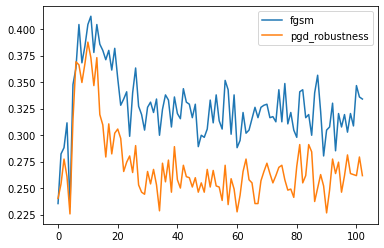

In [12]:
model.train_stats.plot(y=['fgsm', 'pgd_robustness'])

In [13]:
PATH = './train_stats'
torch.save(PATH, model.train_stats)

AttributeError: 'DataFrame' object has no attribute 'flush'

In [ ]:

train_loader, test_loader = load_torchvision_dataset('CIFAR10', data_augmentation=False, batchsize= 256)
model = CifarResNet()
model.to(device)

In [ ]:
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

In [7]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.73046875

In [8]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.728515625

In [9]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 1.89768, adv_train_accuracy: 29.30, clean_train_accuracy : 41.41
[1,     6] loss: 2.06801, adv_train_accuracy: 26.95, clean_train_accuracy : 40.23
[1,    11] loss: 1.86141, adv_train_accuracy: 29.30, clean_train_accuracy : 46.48
[1,    16] loss: 1.91393, adv_train_accuracy: 26.95, clean_train_accuracy : 46.09
0.701171875
0.720703125
duration: 26 s - train loss: 1.90462 - train accuracy: 28.75 - validation loss: 1.59208 - validation accuracy: 41.48 
[2,     1] loss: 1.87206, adv_train_accuracy: 30.08, clean_train_accuracy : 42.97
[2,     6] loss: 1.90144, adv_train_accuracy: 29.30, clean_train_accuracy : 46.09
[2,    11] loss: 1.86576, adv_train_accuracy: 27.34, clean_train_accuracy : 43.36
[2,    16] loss: 1.90111, adv_train_accuracy: 26.17, clean_train_accuracy : 50.39
0.73046875
0.763671875
duration: 26 s - train loss: 1.92003 - train accuracy: 27.60 - validation loss: 1.59478 - validation accuracy: 42.71 
[3,     1] loss: 1

[18,    11] loss: 1.88019, adv_train_accuracy: 34.77, clean_train_accuracy : 49.61
[18,    16] loss: 1.64940, adv_train_accuracy: 39.06, clean_train_accuracy : 55.08
0.6875
0.69921875
duration: 26 s - train loss: 1.83444 - train accuracy: 32.71 - validation loss: 1.46453 - validation accuracy: 47.94 
[19,     1] loss: 1.76931, adv_train_accuracy: 36.72, clean_train_accuracy : 57.03
[19,     6] loss: 1.74468, adv_train_accuracy: 35.94, clean_train_accuracy : 53.52
[19,    11] loss: 1.68434, adv_train_accuracy: 38.28, clean_train_accuracy : 54.30
[19,    16] loss: 1.82455, adv_train_accuracy: 28.12, clean_train_accuracy : 48.44
0.693359375
0.697265625
duration: 26 s - train loss: 1.79122 - train accuracy: 32.71 - validation loss: 1.39653 - validation accuracy: 50.52 
[20,     1] loss: 1.77044, adv_train_accuracy: 32.81, clean_train_accuracy : 50.39
[20,     6] loss: 1.81471, adv_train_accuracy: 33.20, clean_train_accuracy : 47.66
[20,    11] loss: 1.67772, adv_train_accuracy: 39.45, clea

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
5,6,2.199005,19.765625,1.971533,NaN,NaN,NaN,NaN,NaN,NaN,27.04,158.850918,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
6,7,2.307448,18.808594,1.949130,NaN,NaN,NaN,NaN,NaN,NaN,31.58,185.245145,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
7,8,2.201714,20.566406,1.791573,NaN,NaN,NaN,NaN,NaN,NaN,36.99,211.538478,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
8,9,2.089135,22.734375,1.791103,NaN,NaN,NaN,NaN,NaN,NaN,36.43,237.923156,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
9,10,2.069923,24.648438,1.794747,NaN,NaN,NaN,NaN,NaN,NaN,33.95,264.267743,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [10]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.67578125

In [11]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.732421875

In [29]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 1.68227, adv_train_accuracy: 37.11, clean_train_accuracy : 59.38
[1,     6] loss: 1.60897, adv_train_accuracy: 37.50, clean_train_accuracy : 55.86
[1,    11] loss: 1.77223, adv_train_accuracy: 35.94, clean_train_accuracy : 50.00
[1,    16] loss: 1.68347, adv_train_accuracy: 33.59, clean_train_accuracy : 56.25
0.65234375
0.712890625
duration: 24 s - train loss: 1.72010 - train accuracy: 34.02 - validation loss: 1.41090 - validation accuracy: 48.69 
[2,     1] loss: 1.75781, adv_train_accuracy: 33.59, clean_train_accuracy : 50.39
[2,     6] loss: 1.75958, adv_train_accuracy: 32.42, clean_train_accuracy : 52.34
[2,    11] loss: 1.75052, adv_train_accuracy: 36.72, clean_train_accuracy : 56.25
[2,    16] loss: 1.67068, adv_train_accuracy: 37.11, clean_train_accuracy : 55.86
0.728515625
0.73046875
duration: 24 s - train loss: 1.72825 - train accuracy: 35.49 - validation loss: 1.35618 - validation accuracy: 50.99 
[3,     1] loss: 1.

[18,    11] loss: 1.64666, adv_train_accuracy: 34.77, clean_train_accuracy : 54.69
[18,    16] loss: 1.69380, adv_train_accuracy: 34.38, clean_train_accuracy : 58.59
0.62890625
0.64453125
duration: 26 s - train loss: 1.65569 - train accuracy: 37.13 - validation loss: 1.23416 - validation accuracy: 55.72 
[19,     1] loss: 1.63771, adv_train_accuracy: 36.33, clean_train_accuracy : 53.52
[19,     6] loss: 1.73930, adv_train_accuracy: 39.06, clean_train_accuracy : 56.64
[19,    11] loss: 1.73513, adv_train_accuracy: 38.28, clean_train_accuracy : 57.42
[19,    16] loss: 1.53820, adv_train_accuracy: 39.84, clean_train_accuracy : 60.55
0.701171875
0.708984375
duration: 26 s - train loss: 1.62709 - train accuracy: 38.05 - validation loss: 1.26147 - validation accuracy: 54.95 
[20,     1] loss: 1.53243, adv_train_accuracy: 41.02, clean_train_accuracy : 59.77
[20,     6] loss: 1.53170, adv_train_accuracy: 42.97, clean_train_accuracy : 60.16
[20,    11] loss: 1.64540, adv_train_accuracy: 38.67, 

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
5,6,2.199005,19.765625,1.971533,NaN,NaN,NaN,NaN,NaN,NaN,27.04,158.850918,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
6,7,2.307448,18.808594,1.949130,NaN,NaN,NaN,NaN,NaN,NaN,31.58,185.245145,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
7,8,2.201714,20.566406,1.791573,NaN,NaN,NaN,NaN,NaN,NaN,36.99,211.538478,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
8,9,2.089135,22.734375,1.791103,NaN,NaN,NaN,NaN,NaN,NaN,36.43,237.923156,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
9,10,2.069923,24.648438,1.794747,NaN,NaN,NaN,NaN,NaN,NaN,33.95,264.267743,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [30]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.689453125

In [31]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.673828125

In [32]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 1.52565, adv_train_accuracy: 41.02, clean_train_accuracy : 66.80
[1,     6] loss: 1.58863, adv_train_accuracy: 37.11, clean_train_accuracy : 64.84
[1,    11] loss: 1.55582, adv_train_accuracy: 40.23, clean_train_accuracy : 64.45
[1,    16] loss: 1.59265, adv_train_accuracy: 41.02, clean_train_accuracy : 59.77
0.640625
0.693359375
duration: 26 s - train loss: 1.59359 - train accuracy: 39.77 - validation loss: 1.21048 - validation accuracy: 57.81 
[2,     1] loss: 1.65444, adv_train_accuracy: 39.45, clean_train_accuracy : 61.72
[2,     6] loss: 1.72484, adv_train_accuracy: 34.77, clean_train_accuracy : 59.77
[2,    11] loss: 1.58743, adv_train_accuracy: 35.94, clean_train_accuracy : 57.81
[2,    16] loss: 1.59266, adv_train_accuracy: 39.06, clean_train_accuracy : 62.11
0.6796875
0.705078125
duration: 26 s - train loss: 1.58398 - train accuracy: 39.73 - validation loss: 1.18526 - validation accuracy: 59.23 
[3,     1] loss: 1.574

[18,    16] loss: 1.47374, adv_train_accuracy: 42.97, clean_train_accuracy : 69.92
0.669921875
0.681640625
duration: 26 s - train loss: 1.49279 - train accuracy: 42.17 - validation loss: 1.13008 - validation accuracy: 61.01 
[19,     1] loss: 1.51225, adv_train_accuracy: 37.89, clean_train_accuracy : 66.02
[19,     6] loss: 1.50439, adv_train_accuracy: 40.62, clean_train_accuracy : 66.80
[19,    11] loss: 1.45104, adv_train_accuracy: 42.58, clean_train_accuracy : 68.75
[19,    16] loss: 1.49299, adv_train_accuracy: 39.06, clean_train_accuracy : 70.70
0.638671875
0.671875
duration: 26 s - train loss: 1.48920 - train accuracy: 43.59 - validation loss: 1.10397 - validation accuracy: 62.82 
[20,     1] loss: 1.43671, adv_train_accuracy: 44.14, clean_train_accuracy : 70.70
[20,     6] loss: 1.45057, adv_train_accuracy: 44.92, clean_train_accuracy : 66.80
[20,    11] loss: 1.42359, adv_train_accuracy: 46.09, clean_train_accuracy : 69.14
[20,    16] loss: 1.43523, adv_train_accuracy: 42.19, c

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,16,1.498022,41.933594,1.148745,NaN,NaN,NaN,NaN,NaN,NaN,60.31,421.287490,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
76,17,1.482442,43.222656,1.091187,NaN,NaN,NaN,NaN,NaN,NaN,63.22,447.576633,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
77,18,1.492787,42.167969,1.130076,NaN,NaN,NaN,NaN,NaN,NaN,61.01,473.902789,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
78,19,1.489198,43.593750,1.103975,NaN,NaN,NaN,NaN,NaN,NaN,62.82,500.281428,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [33]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.6796875

In [34]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.693359375

In [35]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 1.50411, adv_train_accuracy: 44.14, clean_train_accuracy : 71.09
[1,     6] loss: 1.49695, adv_train_accuracy: 41.02, clean_train_accuracy : 67.58
[1,    11] loss: 1.39711, adv_train_accuracy: 45.70, clean_train_accuracy : 73.44
[1,    16] loss: 1.41901, adv_train_accuracy: 44.14, clean_train_accuracy : 68.75
0.66015625
0.66015625
duration: 26 s - train loss: 1.42912 - train accuracy: 45.21 - validation loss: 1.09451 - validation accuracy: 60.20 
[2,     1] loss: 1.50919, adv_train_accuracy: 41.80, clean_train_accuracy : 64.45
[2,     6] loss: 1.41298, adv_train_accuracy: 50.39, clean_train_accuracy : 76.17
[2,    11] loss: 1.36800, adv_train_accuracy: 48.05, clean_train_accuracy : 76.56
[2,    16] loss: 1.41585, adv_train_accuracy: 48.83, clean_train_accuracy : 72.66
0.6640625
0.650390625
duration: 26 s - train loss: 1.45949 - train accuracy: 44.18 - validation loss: 1.10071 - validation accuracy: 62.40 
[3,     1] loss: 1.46

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16,1.358931,46.757812,1.012950,NaN,NaN,NaN,NaN,NaN,NaN,65.68,423.032934,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
96,17,1.366647,48.281250,0.999900,NaN,NaN,NaN,NaN,NaN,NaN,67.17,449.495956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
97,18,1.393320,47.246094,1.021983,NaN,NaN,NaN,NaN,NaN,NaN,65.79,475.847281,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
98,19,1.347932,48.183594,1.009724,NaN,NaN,NaN,NaN,NaN,NaN,65.88,502.166666,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [36]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.6015625

In [37]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.666015625

In [38]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 1.33263, adv_train_accuracy: 47.27, clean_train_accuracy : 75.00
[1,     6] loss: 1.39286, adv_train_accuracy: 44.14, clean_train_accuracy : 76.17
[1,    11] loss: 1.42715, adv_train_accuracy: 49.61, clean_train_accuracy : 76.56
[1,    16] loss: 1.30952, adv_train_accuracy: 51.56, clean_train_accuracy : 77.34
0.634765625
0.658203125
duration: 26 s - train loss: 1.34981 - train accuracy: 47.85 - validation loss: 1.06058 - validation accuracy: 65.63 
[2,     1] loss: 1.37787, adv_train_accuracy: 46.88, clean_train_accuracy : 73.83
[2,     6] loss: 1.34088, adv_train_accuracy: 48.05, clean_train_accuracy : 78.91
[2,    11] loss: 1.24699, adv_train_accuracy: 48.44, clean_train_accuracy : 75.78
[2,    16] loss: 1.29017, adv_train_accuracy: 47.66, clean_train_accuracy : 75.39
0.66796875
0.642578125
duration: 26 s - train loss: 1.33071 - train accuracy: 48.57 - validation loss: 1.02726 - validation accuracy: 64.12 
[3,     1] loss: 1

[18,    11] loss: 1.25184, adv_train_accuracy: 50.39, clean_train_accuracy : 78.12
[18,    16] loss: 1.21901, adv_train_accuracy: 51.56, clean_train_accuracy : 83.59
0.630859375
0.6796875
duration: 26 s - train loss: 1.23225 - train accuracy: 51.89 - validation loss: 0.96147 - validation accuracy: 67.35 
[19,     1] loss: 1.21977, adv_train_accuracy: 51.17, clean_train_accuracy : 82.81
[19,     6] loss: 1.28869, adv_train_accuracy: 48.83, clean_train_accuracy : 78.12
[19,    11] loss: 1.12677, adv_train_accuracy: 51.17, clean_train_accuracy : 83.20
[19,    16] loss: 1.32238, adv_train_accuracy: 53.52, clean_train_accuracy : 79.69
0.658203125
0.65234375
duration: 26 s - train loss: 1.23068 - train accuracy: 52.38 - validation loss: 0.96737 - validation accuracy: 65.51 
[20,     1] loss: 1.18006, adv_train_accuracy: 55.08, clean_train_accuracy : 82.03
[20,     6] loss: 1.16888, adv_train_accuracy: 53.91, clean_train_accuracy : 82.03
[20,    11] loss: 1.24370, adv_train_accuracy: 51.56, c

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,16,1.251685,51.484375,0.987034,NaN,NaN,NaN,NaN,NaN,NaN,66.55,421.746048,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
116,17,1.279591,50.781250,0.928279,NaN,NaN,NaN,NaN,NaN,NaN,67.79,447.976815,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
117,18,1.232246,51.894531,0.961465,NaN,NaN,NaN,NaN,NaN,NaN,67.35,474.279655,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
118,19,1.230676,52.382812,0.967372,NaN,NaN,NaN,NaN,NaN,NaN,65.51,500.522663,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [39]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.646484375

In [40]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.67578125

In [41]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 1.21576, adv_train_accuracy: 52.34, clean_train_accuracy : 82.03
[1,     6] loss: 1.27279, adv_train_accuracy: 49.22, clean_train_accuracy : 74.61
[1,    11] loss: 1.04234, adv_train_accuracy: 60.94, clean_train_accuracy : 84.38
[1,    16] loss: 1.13040, adv_train_accuracy: 55.86, clean_train_accuracy : 86.72
0.63671875
0.708984375
duration: 26 s - train loss: 1.17831 - train accuracy: 53.67 - validation loss: 0.89072 - validation accuracy: 69.61 
[2,     1] loss: 1.04852, adv_train_accuracy: 60.16, clean_train_accuracy : 87.11
[2,     6] loss: 1.14355, adv_train_accuracy: 57.81, clean_train_accuracy : 82.03
[2,    11] loss: 1.26960, adv_train_accuracy: 50.39, clean_train_accuracy : 82.81
[2,    16] loss: 1.27066, adv_train_accuracy: 51.17, clean_train_accuracy : 80.08
0.654296875
0.662109375
duration: 26 s - train loss: 1.20619 - train accuracy: 53.05 - validation loss: 0.94099 - validation accuracy: 67.05 
[3,     1] loss: 1

[18,    11] loss: 1.08912, adv_train_accuracy: 59.38, clean_train_accuracy : 83.98
[18,    16] loss: 1.13742, adv_train_accuracy: 57.42, clean_train_accuracy : 83.20
0.658203125
0.703125
duration: 26 s - train loss: 1.07859 - train accuracy: 57.46 - validation loss: 0.94345 - validation accuracy: 67.91 
[19,     1] loss: 1.07441, adv_train_accuracy: 62.11, clean_train_accuracy : 84.77
[19,     6] loss: 0.97323, adv_train_accuracy: 59.77, clean_train_accuracy : 91.41
[19,    11] loss: 1.04711, adv_train_accuracy: 56.25, clean_train_accuracy : 85.94
[19,    16] loss: 0.95341, adv_train_accuracy: 62.89, clean_train_accuracy : 86.72
0.638671875
0.673828125
duration: 26 s - train loss: 1.04023 - train accuracy: 59.22 - validation loss: 0.88106 - validation accuracy: 69.58 
[20,     1] loss: 0.99843, adv_train_accuracy: 63.67, clean_train_accuracy : 86.72
[20,     6] loss: 1.00662, adv_train_accuracy: 58.20, clean_train_accuracy : 85.55
[20,    11] loss: 0.97135, adv_train_accuracy: 62.11, c

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,16,1.105373,56.718750,0.900433,NaN,NaN,NaN,NaN,NaN,NaN,68.24,419.668746,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
136,17,1.079970,57.675781,0.881752,NaN,NaN,NaN,NaN,NaN,NaN,67.89,445.909679,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
137,18,1.078593,57.460938,0.943455,NaN,NaN,NaN,NaN,NaN,NaN,67.91,472.059712,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
138,19,1.040229,59.218750,0.881060,NaN,NaN,NaN,NaN,NaN,NaN,69.58,498.136842,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [42]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.607421875

In [43]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.677734375

In [44]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 1.07967, adv_train_accuracy: 57.42, clean_train_accuracy : 85.94
[1,     6] loss: 0.97822, adv_train_accuracy: 60.16, clean_train_accuracy : 84.77
[1,    11] loss: 1.14984, adv_train_accuracy: 55.08, clean_train_accuracy : 82.42
[1,    16] loss: 1.19714, adv_train_accuracy: 55.08, clean_train_accuracy : 84.38
0.59375
0.642578125
duration: 26 s - train loss: 1.08156 - train accuracy: 57.27 - validation loss: 0.84474 - validation accuracy: 71.89 
[2,     1] loss: 0.95498, adv_train_accuracy: 60.16, clean_train_accuracy : 90.23
[2,     6] loss: 0.98254, adv_train_accuracy: 61.72, clean_train_accuracy : 89.84
[2,    11] loss: 1.11601, adv_train_accuracy: 56.25, clean_train_accuracy : 82.42
[2,    16] loss: 0.98263, adv_train_accuracy: 60.55, clean_train_accuracy : 87.89
0.615234375
0.685546875
duration: 26 s - train loss: 1.05808 - train accuracy: 58.24 - validation loss: 0.89936 - validation accuracy: 69.91 
[3,     1] loss: 0.94

[18,    11] loss: 0.98170, adv_train_accuracy: 60.55, clean_train_accuracy : 91.41
[18,    16] loss: 0.96298, adv_train_accuracy: 60.94, clean_train_accuracy : 89.84
0.66796875
0.72265625
duration: 26 s - train loss: 0.91901 - train accuracy: 63.32 - validation loss: 0.89037 - validation accuracy: 69.97 
[19,     1] loss: 0.96723, adv_train_accuracy: 63.67, clean_train_accuracy : 89.84
[19,     6] loss: 0.84840, adv_train_accuracy: 62.89, clean_train_accuracy : 93.36
[19,    11] loss: 0.93357, adv_train_accuracy: 64.84, clean_train_accuracy : 92.19
[19,    16] loss: 0.81831, adv_train_accuracy: 68.36, clean_train_accuracy : 91.41
0.65234375
0.66015625
duration: 26 s - train loss: 0.92387 - train accuracy: 63.75 - validation loss: 0.80815 - validation accuracy: 71.44 
[20,     1] loss: 0.84031, adv_train_accuracy: 65.62, clean_train_accuracy : 89.84
[20,     6] loss: 0.88464, adv_train_accuracy: 64.45, clean_train_accuracy : 91.80
[20,    11] loss: 0.84951, adv_train_accuracy: 60.55, cl

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,16,0.950915,63.554688,0.856370,NaN,NaN,NaN,NaN,NaN,NaN,70.65,418.153418,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
156,17,0.932820,64.277344,0.860561,NaN,NaN,NaN,NaN,NaN,NaN,70.14,444.185078,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
157,18,0.919010,63.320312,0.890369,NaN,NaN,NaN,NaN,NaN,NaN,69.97,470.291247,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
158,19,0.923873,63.750000,0.808147,NaN,NaN,NaN,NaN,NaN,NaN,71.44,496.387788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [45]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.6171875

In [46]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.708984375

In [47]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.96365, adv_train_accuracy: 60.55, clean_train_accuracy : 91.80
[1,     6] loss: 0.98749, adv_train_accuracy: 59.38, clean_train_accuracy : 88.28
[1,    11] loss: 0.83071, adv_train_accuracy: 67.19, clean_train_accuracy : 94.92
[1,    16] loss: 0.89571, adv_train_accuracy: 64.06, clean_train_accuracy : 92.58
0.650390625
0.720703125
duration: 26 s - train loss: 0.88619 - train accuracy: 64.59 - validation loss: 0.80657 - validation accuracy: 72.25 
[2,     1] loss: 0.87608, adv_train_accuracy: 66.80, clean_train_accuracy : 92.58
[2,     6] loss: 0.81441, adv_train_accuracy: 67.19, clean_train_accuracy : 94.14
[2,    11] loss: 0.94616, adv_train_accuracy: 63.28, clean_train_accuracy : 92.19
[2,    16] loss: 0.95136, adv_train_accuracy: 62.11, clean_train_accuracy : 89.84
0.619140625
0.71875
duration: 26 s - train loss: 0.86666 - train accuracy: 65.98 - validation loss: 0.87497 - validation accuracy: 70.30 
[3,     1] loss: 0.78

[18,    11] loss: 0.85724, adv_train_accuracy: 62.89, clean_train_accuracy : 93.36
[18,    16] loss: 0.88682, adv_train_accuracy: 66.80, clean_train_accuracy : 96.09
0.6328125
0.69140625
duration: 25 s - train loss: 0.77000 - train accuracy: 69.47 - validation loss: 0.80986 - validation accuracy: 72.00 
[19,     1] loss: 0.77270, adv_train_accuracy: 69.53, clean_train_accuracy : 92.97
[19,     6] loss: 0.73194, adv_train_accuracy: 67.58, clean_train_accuracy : 96.48
[19,    11] loss: 0.76781, adv_train_accuracy: 69.53, clean_train_accuracy : 94.53
[19,    16] loss: 0.73052, adv_train_accuracy: 66.80, clean_train_accuracy : 93.75
0.626953125
0.728515625
duration: 26 s - train loss: 0.74533 - train accuracy: 70.41 - validation loss: 0.87843 - validation accuracy: 69.92 
[20,     1] loss: 0.82348, adv_train_accuracy: 68.36, clean_train_accuracy : 93.75
[20,     6] loss: 0.76649, adv_train_accuracy: 67.19, clean_train_accuracy : 96.09
[20,    11] loss: 0.67070, adv_train_accuracy: 73.83, c

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,16,0.746039,70.195312,0.857765,NaN,NaN,NaN,NaN,NaN,NaN,71.64,417.692805,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
176,17,0.748815,70.546875,0.846822,NaN,NaN,NaN,NaN,NaN,NaN,71.79,443.754564,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
177,18,0.769998,69.472656,0.809857,NaN,NaN,NaN,NaN,NaN,NaN,72.00,469.738376,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
178,19,0.745331,70.410156,0.878433,NaN,NaN,NaN,NaN,NaN,NaN,69.92,495.880868,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [48]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.654296875

In [49]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.701171875

In [50]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.76576, adv_train_accuracy: 69.92, clean_train_accuracy : 97.66
[1,     6] loss: 0.64834, adv_train_accuracy: 75.39, clean_train_accuracy : 95.31
[1,    11] loss: 0.90028, adv_train_accuracy: 64.45, clean_train_accuracy : 92.19
[1,    16] loss: 0.68982, adv_train_accuracy: 75.78, clean_train_accuracy : 97.27
0.6640625
0.697265625
duration: 26 s - train loss: 0.74073 - train accuracy: 71.82 - validation loss: 0.85591 - validation accuracy: 72.08 
[2,     1] loss: 0.66916, adv_train_accuracy: 72.66, clean_train_accuracy : 96.09
[2,     6] loss: 0.87002, adv_train_accuracy: 66.41, clean_train_accuracy : 92.19
[2,    11] loss: 0.74187, adv_train_accuracy: 70.70, clean_train_accuracy : 96.09
[2,    16] loss: 0.77975, adv_train_accuracy: 67.19, clean_train_accuracy : 96.09
0.701171875
0.72265625
duration: 26 s - train loss: 0.76114 - train accuracy: 69.00 - validation loss: 0.94977 - validation accuracy: 67.78 
[3,     1] loss: 0.8

[18,    11] loss: 0.68884, adv_train_accuracy: 73.05, clean_train_accuracy : 97.27
[18,    16] loss: 0.64069, adv_train_accuracy: 76.17, clean_train_accuracy : 96.48
0.646484375
0.748046875
duration: 26 s - train loss: 0.65606 - train accuracy: 74.16 - validation loss: 0.81519 - validation accuracy: 73.09 
[19,     1] loss: 0.60033, adv_train_accuracy: 80.86, clean_train_accuracy : 97.66
[19,     6] loss: 0.60036, adv_train_accuracy: 76.17, clean_train_accuracy : 96.48
[19,    11] loss: 0.61065, adv_train_accuracy: 73.83, clean_train_accuracy : 94.53
[19,    16] loss: 0.62909, adv_train_accuracy: 74.22, clean_train_accuracy : 96.09
0.67578125
0.716796875
duration: 26 s - train loss: 0.65540 - train accuracy: 74.90 - validation loss: 0.91048 - validation accuracy: 70.35 
[20,     1] loss: 0.75918, adv_train_accuracy: 69.14, clean_train_accuracy : 94.53
[20,     6] loss: 0.57296, adv_train_accuracy: 78.91, clean_train_accuracy : 94.14
[20,    11] loss: 0.76081, adv_train_accuracy: 70.70,

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,16,0.622273,74.550781,0.885481,NaN,NaN,NaN,NaN,NaN,NaN,71.29,417.713232,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
196,17,0.625979,75.039062,0.903601,NaN,NaN,NaN,NaN,NaN,NaN,68.76,443.682465,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
197,18,0.656056,74.160156,0.815195,NaN,NaN,NaN,NaN,NaN,NaN,73.09,469.757959,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
198,19,0.655400,74.902344,0.910476,NaN,NaN,NaN,NaN,NaN,NaN,70.35,495.855919,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [51]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.662109375

In [52]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.724609375

In [53]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.65127, adv_train_accuracy: 72.27, clean_train_accuracy : 96.48
[1,     6] loss: 0.64358, adv_train_accuracy: 73.05, clean_train_accuracy : 95.31
[1,    11] loss: 0.65540, adv_train_accuracy: 70.70, clean_train_accuracy : 94.92
[1,    16] loss: 0.63059, adv_train_accuracy: 76.95, clean_train_accuracy : 96.88
0.666015625
0.740234375
duration: 26 s - train loss: 0.65100 - train accuracy: 73.67 - validation loss: 0.90752 - validation accuracy: 70.18 
[2,     1] loss: 0.74574, adv_train_accuracy: 73.05, clean_train_accuracy : 95.31
[2,     6] loss: 0.62668, adv_train_accuracy: 75.39, clean_train_accuracy : 95.31
[2,    11] loss: 0.58703, adv_train_accuracy: 75.39, clean_train_accuracy : 98.83
[2,    16] loss: 0.53650, adv_train_accuracy: 79.30, clean_train_accuracy : 96.48
0.640625
0.724609375
duration: 25 s - train loss: 0.59727 - train accuracy: 76.11 - validation loss: 0.84494 - validation accuracy: 73.09 
[3,     1] loss: 0.5

[18,    11] loss: 0.48419, adv_train_accuracy: 81.64, clean_train_accuracy : 98.83
[18,    16] loss: 0.48882, adv_train_accuracy: 82.81, clean_train_accuracy : 98.05
0.6328125
0.7265625
duration: 26 s - train loss: 0.48969 - train accuracy: 79.88 - validation loss: 0.90621 - validation accuracy: 71.20 
[19,     1] loss: 0.44070, adv_train_accuracy: 85.16, clean_train_accuracy : 99.61
[19,     6] loss: 0.54257, adv_train_accuracy: 78.12, clean_train_accuracy : 97.66
[19,    11] loss: 0.50127, adv_train_accuracy: 81.64, clean_train_accuracy : 97.27
[19,    16] loss: 0.42733, adv_train_accuracy: 82.81, clean_train_accuracy : 96.88
0.677734375
0.728515625
duration: 26 s - train loss: 0.48138 - train accuracy: 80.86 - validation loss: 0.89846 - validation accuracy: 71.10 
[20,     1] loss: 0.49397, adv_train_accuracy: 80.08, clean_train_accuracy : 96.88
[20,     6] loss: 0.56685, adv_train_accuracy: 76.56, clean_train_accuracy : 97.66
[20,    11] loss: 0.51940, adv_train_accuracy: 76.95, cl

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,16,0.513220,79.824219,0.850472,NaN,NaN,NaN,NaN,NaN,NaN,71.55,415.981601,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
216,17,0.525769,79.218750,0.847683,NaN,NaN,NaN,NaN,NaN,NaN,72.10,442.231275,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
217,18,0.489694,79.882812,0.906207,NaN,NaN,NaN,NaN,NaN,NaN,71.20,468.529715,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
218,19,0.481381,80.859375,0.898460,NaN,NaN,NaN,NaN,NaN,NaN,71.10,494.900061,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [54]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.7109375

In [55]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.765625

In [56]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.49696, adv_train_accuracy: 78.12, clean_train_accuracy : 99.22
[1,     6] loss: 0.40134, adv_train_accuracy: 83.98, clean_train_accuracy : 98.83
[1,    11] loss: 0.52894, adv_train_accuracy: 79.30, clean_train_accuracy : 96.48
[1,    16] loss: 0.42151, adv_train_accuracy: 83.59, clean_train_accuracy : 98.05
0.64453125
0.71484375
duration: 26 s - train loss: 0.47769 - train accuracy: 81.23 - validation loss: 0.93654 - validation accuracy: 70.72 
[2,     1] loss: 0.58664, adv_train_accuracy: 78.91, clean_train_accuracy : 97.27
[2,     6] loss: 0.49328, adv_train_accuracy: 79.69, clean_train_accuracy : 98.83
[2,    11] loss: 0.39800, adv_train_accuracy: 84.77, clean_train_accuracy : 96.88
[2,    16] loss: 0.46152, adv_train_accuracy: 82.03, clean_train_accuracy : 98.44
0.666015625
0.7421875
duration: 26 s - train loss: 0.48150 - train accuracy: 80.74 - validation loss: 0.86997 - validation accuracy: 72.44 
[3,     1] loss: 0.39

[18,    11] loss: 0.37667, adv_train_accuracy: 85.16, clean_train_accuracy : 99.61
[18,    16] loss: 0.41865, adv_train_accuracy: 85.55, clean_train_accuracy : 98.83
0.693359375
0.736328125
duration: 26 s - train loss: 0.42484 - train accuracy: 83.69 - validation loss: 0.96930 - validation accuracy: 71.53 
[19,     1] loss: 0.40208, adv_train_accuracy: 84.38, clean_train_accuracy : 98.44
[19,     6] loss: 0.35392, adv_train_accuracy: 85.16, clean_train_accuracy : 99.61
[19,    11] loss: 0.43544, adv_train_accuracy: 84.38, clean_train_accuracy : 98.05
[19,    16] loss: 0.43063, adv_train_accuracy: 84.77, clean_train_accuracy : 99.22
0.662109375
0.755859375
duration: 26 s - train loss: 0.39468 - train accuracy: 84.26 - validation loss: 0.89694 - validation accuracy: 71.51 
[20,     1] loss: 0.41201, adv_train_accuracy: 84.38, clean_train_accuracy : 99.22
[20,     6] loss: 0.44030, adv_train_accuracy: 81.25, clean_train_accuracy : 99.61
[20,    11] loss: 0.49435, adv_train_accuracy: 81.64

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,16,0.383871,84.726562,0.933191,NaN,NaN,NaN,NaN,NaN,NaN,71.95,418.488399,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
236,17,0.386753,84.921875,0.927244,NaN,NaN,NaN,NaN,NaN,NaN,71.48,444.528893,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
237,18,0.424838,83.691406,0.969295,NaN,NaN,NaN,NaN,NaN,NaN,71.53,470.638513,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
238,19,0.394678,84.257812,0.896936,NaN,NaN,NaN,NaN,NaN,NaN,71.51,496.677764,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [57]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.6875

In [58]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.7265625

In [59]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.36227, adv_train_accuracy: 84.38, clean_train_accuracy : 100.00
[1,     6] loss: 0.29763, adv_train_accuracy: 89.06, clean_train_accuracy : 97.66
[1,    11] loss: 0.34024, adv_train_accuracy: 85.55, clean_train_accuracy : 99.61
[1,    16] loss: 0.31391, adv_train_accuracy: 89.45, clean_train_accuracy : 99.61
0.669921875
0.73828125
duration: 26 s - train loss: 0.37298 - train accuracy: 85.18 - validation loss: 0.89034 - validation accuracy: 72.44 
[2,     1] loss: 0.31012, adv_train_accuracy: 86.72, clean_train_accuracy : 98.44
[2,     6] loss: 0.38679, adv_train_accuracy: 83.20, clean_train_accuracy : 98.83
[2,    11] loss: 0.34688, adv_train_accuracy: 86.72, clean_train_accuracy : 99.61
[2,    16] loss: 0.40312, adv_train_accuracy: 80.86, clean_train_accuracy : 99.22
0.708984375
0.697265625
duration: 26 s - train loss: 0.37116 - train accuracy: 84.71 - validation loss: 0.89954 - validation accuracy: 72.20 
[3,     1] loss: 

[18,    11] loss: 0.30849, adv_train_accuracy: 86.33, clean_train_accuracy : 99.22
[18,    16] loss: 0.32062, adv_train_accuracy: 86.33, clean_train_accuracy : 99.22
0.669921875
0.720703125
duration: 26 s - train loss: 0.31668 - train accuracy: 87.83 - validation loss: 0.90042 - validation accuracy: 72.60 
[19,     1] loss: 0.37241, adv_train_accuracy: 84.77, clean_train_accuracy : 98.83
[19,     6] loss: 0.33860, adv_train_accuracy: 87.89, clean_train_accuracy : 98.44
[19,    11] loss: 0.24915, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
[19,    16] loss: 0.28202, adv_train_accuracy: 87.89, clean_train_accuracy : 99.61
0.67578125
0.7578125
duration: 26 s - train loss: 0.32703 - train accuracy: 87.05 - validation loss: 0.95727 - validation accuracy: 71.99 
[20,     1] loss: 0.39689, adv_train_accuracy: 85.16, clean_train_accuracy : 98.83
[20,     6] loss: 0.24378, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[20,    11] loss: 0.30404, adv_train_accuracy: 89.84,

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,16,0.320956,86.835938,0.888691,NaN,NaN,NaN,NaN,NaN,NaN,73.29,417.413660,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
256,17,0.293502,88.164062,0.931090,NaN,NaN,NaN,NaN,NaN,NaN,72.73,443.453804,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
257,18,0.316678,87.832031,0.900421,NaN,NaN,NaN,NaN,NaN,NaN,72.60,469.481604,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
258,19,0.327025,87.050781,0.957270,NaN,NaN,NaN,NaN,NaN,NaN,71.99,495.534477,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [60]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.66015625

In [61]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.75390625

In [62]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.31123, adv_train_accuracy: 88.67, clean_train_accuracy : 99.61
[1,     6] loss: 0.32791, adv_train_accuracy: 87.11, clean_train_accuracy : 98.44
[1,    11] loss: 0.30133, adv_train_accuracy: 87.89, clean_train_accuracy : 100.00
[1,    16] loss: 0.24426, adv_train_accuracy: 90.23, clean_train_accuracy : 99.61
0.671875
0.724609375
duration: 25 s - train loss: 0.28096 - train accuracy: 89.06 - validation loss: 0.96146 - validation accuracy: 72.81 
[2,     1] loss: 0.24819, adv_train_accuracy: 89.45, clean_train_accuracy : 98.83
[2,     6] loss: 0.27491, adv_train_accuracy: 87.89, clean_train_accuracy : 98.44
[2,    11] loss: 0.31867, adv_train_accuracy: 88.28, clean_train_accuracy : 99.22
[2,    16] loss: 0.26691, adv_train_accuracy: 88.67, clean_train_accuracy : 98.44
0.662109375
0.728515625
duration: 26 s - train loss: 0.29319 - train accuracy: 88.14 - validation loss: 0.94609 - validation accuracy: 72.26 
[3,     1] loss: 0.

[18,    11] loss: 0.26072, adv_train_accuracy: 88.67, clean_train_accuracy : 100.00
[18,    16] loss: 0.39390, adv_train_accuracy: 82.81, clean_train_accuracy : 99.61
0.70703125
0.80859375
duration: 26 s - train loss: 0.30046 - train accuracy: 88.16 - validation loss: 0.96238 - validation accuracy: 71.53 
[19,     1] loss: 0.35224, adv_train_accuracy: 84.38, clean_train_accuracy : 99.61
[19,     6] loss: 0.21526, adv_train_accuracy: 91.80, clean_train_accuracy : 99.22
[19,    11] loss: 0.24114, adv_train_accuracy: 91.41, clean_train_accuracy : 99.22
[19,    16] loss: 0.30954, adv_train_accuracy: 84.77, clean_train_accuracy : 100.00
0.6640625
0.75390625
duration: 26 s - train loss: 0.29808 - train accuracy: 88.18 - validation loss: 1.02996 - validation accuracy: 71.43 
[20,     1] loss: 0.31439, adv_train_accuracy: 87.50, clean_train_accuracy : 99.61
[20,     6] loss: 0.29577, adv_train_accuracy: 87.50, clean_train_accuracy : 99.61
[20,    11] loss: 0.24912, adv_train_accuracy: 91.80, c

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,16,0.351104,86.093750,0.936510,NaN,NaN,NaN,NaN,NaN,NaN,72.31,421.187411,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
276,17,0.316270,87.792969,0.954886,NaN,NaN,NaN,NaN,NaN,NaN,72.29,447.475544,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
277,18,0.300461,88.164062,0.962383,NaN,NaN,NaN,NaN,NaN,NaN,71.53,473.745143,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
278,19,0.298084,88.183594,1.029958,NaN,NaN,NaN,NaN,NaN,NaN,71.43,499.942343,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [63]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.66796875

In [64]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.71875

In [65]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.29716, adv_train_accuracy: 89.45, clean_train_accuracy : 98.83
[1,     6] loss: 0.30633, adv_train_accuracy: 88.67, clean_train_accuracy : 99.61
[1,    11] loss: 0.28403, adv_train_accuracy: 87.89, clean_train_accuracy : 100.00
[1,    16] loss: 0.26278, adv_train_accuracy: 91.41, clean_train_accuracy : 98.44
0.6953125
0.720703125
duration: 26 s - train loss: 0.28021 - train accuracy: 89.63 - validation loss: 1.01731 - validation accuracy: 72.00 
[2,     1] loss: 0.25274, adv_train_accuracy: 89.84, clean_train_accuracy : 99.22
[2,     6] loss: 0.29647, adv_train_accuracy: 89.84, clean_train_accuracy : 99.61
[2,    11] loss: 0.21771, adv_train_accuracy: 92.97, clean_train_accuracy : 99.61
[2,    16] loss: 0.28240, adv_train_accuracy: 90.23, clean_train_accuracy : 99.61
0.728515625
0.755859375
duration: 26 s - train loss: 0.28321 - train accuracy: 88.69 - validation loss: 0.99070 - validation accuracy: 72.34 
[3,     1] loss: 0

[18,    11] loss: 0.19101, adv_train_accuracy: 91.80, clean_train_accuracy : 100.00
[18,    16] loss: 0.19373, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
0.69921875
0.7421875
duration: 26 s - train loss: 0.22796 - train accuracy: 90.78 - validation loss: 0.98945 - validation accuracy: 73.22 
[19,     1] loss: 0.16857, adv_train_accuracy: 93.75, clean_train_accuracy : 99.61
[19,     6] loss: 0.16132, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[19,    11] loss: 0.17184, adv_train_accuracy: 94.53, clean_train_accuracy : 99.61
[19,    16] loss: 0.18077, adv_train_accuracy: 93.36, clean_train_accuracy : 100.00
0.7109375
0.716796875
duration: 26 s - train loss: 0.20507 - train accuracy: 92.29 - validation loss: 0.96015 - validation accuracy: 72.85 
[20,     1] loss: 0.19884, adv_train_accuracy: 91.02, clean_train_accuracy : 99.61
[20,     6] loss: 0.18573, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[20,    11] loss: 0.19404, adv_train_accuracy: 92.19

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,16,0.267434,89.589844,0.902936,NaN,NaN,NaN,NaN,NaN,NaN,71.96,419.792504,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
296,17,0.236173,90.527344,0.973497,NaN,NaN,NaN,NaN,NaN,NaN,72.25,445.994847,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
297,18,0.227965,90.781250,0.989452,NaN,NaN,NaN,NaN,NaN,NaN,73.22,472.196134,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
298,19,0.205065,92.285156,0.960155,NaN,NaN,NaN,NaN,NaN,NaN,72.85,498.507426,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [66]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.64453125

In [67]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.734375

In [68]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.16947, adv_train_accuracy: 94.14, clean_train_accuracy : 99.61
[1,     6] loss: 0.18315, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[1,    11] loss: 0.21003, adv_train_accuracy: 93.36, clean_train_accuracy : 100.00
[1,    16] loss: 0.30578, adv_train_accuracy: 88.28, clean_train_accuracy : 100.00
0.65625
0.73046875
duration: 26 s - train loss: 0.20121 - train accuracy: 92.21 - validation loss: 1.00304 - validation accuracy: 72.85 
[2,     1] loss: 0.19700, adv_train_accuracy: 91.80, clean_train_accuracy : 98.44
[2,     6] loss: 0.26725, adv_train_accuracy: 91.02, clean_train_accuracy : 100.00
[2,    11] loss: 0.23576, adv_train_accuracy: 90.62, clean_train_accuracy : 100.00
[2,    16] loss: 0.31746, adv_train_accuracy: 89.84, clean_train_accuracy : 99.61
0.66015625
0.767578125
duration: 26 s - train loss: 0.23749 - train accuracy: 91.00 - validation loss: 1.00129 - validation accuracy: 71.47 
[3,     1] loss: 0

[18,    11] loss: 0.19858, adv_train_accuracy: 91.02, clean_train_accuracy : 99.61
[18,    16] loss: 0.14276, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
0.68359375
0.734375
duration: 26 s - train loss: 0.18667 - train accuracy: 93.01 - validation loss: 1.01676 - validation accuracy: 73.27 
[19,     1] loss: 0.12738, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[19,     6] loss: 0.16358, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[19,    11] loss: 0.26273, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
[19,    16] loss: 0.15289, adv_train_accuracy: 94.92, clean_train_accuracy : 99.22
0.716796875
0.748046875
duration: 26 s - train loss: 0.19706 - train accuracy: 91.97 - validation loss: 1.06382 - validation accuracy: 72.01 
[20,     1] loss: 0.23576, adv_train_accuracy: 92.19, clean_train_accuracy : 99.61
[20,     6] loss: 0.15983, adv_train_accuracy: 92.19, clean_train_accuracy : 99.61
[20,    11] loss: 0.17887, adv_train_accuracy: 92.58

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,16,0.182025,93.183594,0.961434,NaN,NaN,NaN,NaN,NaN,NaN,73.63,419.073536,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
316,17,0.179248,93.320312,1.009441,NaN,NaN,NaN,NaN,NaN,NaN,72.73,445.158308,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
317,18,0.186667,93.007812,1.016756,NaN,NaN,NaN,NaN,NaN,NaN,73.27,471.321837,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
318,19,0.197062,91.972656,1.063818,NaN,NaN,NaN,NaN,NaN,NaN,72.01,497.441381,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [69]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.634765625

In [70]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.7578125

In [71]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.18506, adv_train_accuracy: 92.97, clean_train_accuracy : 99.61
[1,     6] loss: 0.20237, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[1,    11] loss: 0.21115, adv_train_accuracy: 91.80, clean_train_accuracy : 99.61
[1,    16] loss: 0.20351, adv_train_accuracy: 92.58, clean_train_accuracy : 99.61
0.640625
0.76171875
duration: 26 s - train loss: 0.20143 - train accuracy: 92.25 - validation loss: 0.97370 - validation accuracy: 73.48 
[2,     1] loss: 0.19454, adv_train_accuracy: 91.80, clean_train_accuracy : 100.00
[2,     6] loss: 0.16332, adv_train_accuracy: 93.36, clean_train_accuracy : 99.61
[2,    11] loss: 0.15289, adv_train_accuracy: 92.97, clean_train_accuracy : 99.61
[2,    16] loss: 0.20829, adv_train_accuracy: 92.19, clean_train_accuracy : 99.61
0.65625
0.72265625
duration: 26 s - train loss: 0.18416 - train accuracy: 93.01 - validation loss: 1.04101 - validation accuracy: 72.50 
[3,     1] loss: 0.20737

[18,    11] loss: 0.18996, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
[18,    16] loss: 0.15984, adv_train_accuracy: 92.58, clean_train_accuracy : 100.00
0.6640625
0.759765625
duration: 26 s - train loss: 0.17657 - train accuracy: 92.95 - validation loss: 1.02389 - validation accuracy: 72.54 
[19,     1] loss: 0.14040, adv_train_accuracy: 94.53, clean_train_accuracy : 100.00
[19,     6] loss: 0.15084, adv_train_accuracy: 93.36, clean_train_accuracy : 100.00
[19,    11] loss: 0.18563, adv_train_accuracy: 92.58, clean_train_accuracy : 100.00
[19,    16] loss: 0.28425, adv_train_accuracy: 89.06, clean_train_accuracy : 100.00
0.701171875
0.72265625
duration: 26 s - train loss: 0.17438 - train accuracy: 93.46 - validation loss: 1.05285 - validation accuracy: 72.57 
[20,     1] loss: 0.18076, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[20,     6] loss: 0.16069, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[20,    11] loss: 0.20244, adv_train_accuracy: 

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,16,0.207767,92.207031,1.003103,NaN,NaN,NaN,NaN,NaN,NaN,71.68,416.562722,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
336,17,0.165894,93.710938,1.114807,NaN,NaN,NaN,NaN,NaN,NaN,71.26,442.664834,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
337,18,0.176574,92.949219,1.023890,NaN,NaN,NaN,NaN,NaN,NaN,72.54,468.665618,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
338,19,0.174385,93.457031,1.052848,NaN,NaN,NaN,NaN,NaN,NaN,72.57,494.955294,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [72]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.693359375

In [73]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.767578125

In [74]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.16889, adv_train_accuracy: 94.53, clean_train_accuracy : 99.61
[1,     6] loss: 0.16321, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
[1,    11] loss: 0.37779, adv_train_accuracy: 87.11, clean_train_accuracy : 100.00
[1,    16] loss: 0.30959, adv_train_accuracy: 88.67, clean_train_accuracy : 99.22
0.697265625
0.71875
duration: 26 s - train loss: 0.24782 - train accuracy: 90.94 - validation loss: 0.95020 - validation accuracy: 71.54 
[2,     1] loss: 0.21022, adv_train_accuracy: 91.02, clean_train_accuracy : 99.22
[2,     6] loss: 0.18885, adv_train_accuracy: 92.97, clean_train_accuracy : 99.61
[2,    11] loss: 0.15164, adv_train_accuracy: 94.14, clean_train_accuracy : 100.00
[2,    16] loss: 0.19662, adv_train_accuracy: 92.97, clean_train_accuracy : 100.00
0.69140625
0.734375
duration: 26 s - train loss: 0.18458 - train accuracy: 92.83 - validation loss: 1.06309 - validation accuracy: 72.66 
[3,     1] loss: 0.20

[18,    11] loss: 0.15879, adv_train_accuracy: 94.14, clean_train_accuracy : 100.00
[18,    16] loss: 0.20898, adv_train_accuracy: 91.41, clean_train_accuracy : 100.00
0.681640625
0.732421875
duration: 26 s - train loss: 0.17810 - train accuracy: 93.30 - validation loss: 1.03942 - validation accuracy: 72.62 
[19,     1] loss: 0.16492, adv_train_accuracy: 92.97, clean_train_accuracy : 99.61
[19,     6] loss: 0.14674, adv_train_accuracy: 95.70, clean_train_accuracy : 99.61
[19,    11] loss: 0.20795, adv_train_accuracy: 93.36, clean_train_accuracy : 100.00
[19,    16] loss: 0.17964, adv_train_accuracy: 92.58, clean_train_accuracy : 100.00
0.701171875
0.775390625
duration: 26 s - train loss: 0.17331 - train accuracy: 93.73 - validation loss: 0.98477 - validation accuracy: 73.39 
[20,     1] loss: 0.14873, adv_train_accuracy: 92.58, clean_train_accuracy : 100.00
[20,     6] loss: 0.13645, adv_train_accuracy: 94.14, clean_train_accuracy : 100.00
[20,    11] loss: 0.18422, adv_train_accuracy:

,epoch,train_loss,train_accuracy,validation_loss,l_inf_robustness,l_inf_loss,l_2_robustness,l_2_loss,l_0_robustness,l_0_loss,validation_accuracy,duration,criterion,optimizer,method,learning_rate,batchsize
0,1,10.069616,10.019531,3.418694,NaN,NaN,NaN,NaN,NaN,NaN,14.26,27.299788,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
1,2,3.292510,8.789062,2.192064,NaN,NaN,NaN,NaN,NaN,NaN,23.43,53.504930,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
2,3,2.474881,13.281250,2.233554,NaN,NaN,NaN,NaN,NaN,NaN,27.19,79.630913,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
3,4,2.347974,16.093750,2.084406,NaN,NaN,NaN,NaN,NaN,NaN,28.54,106.239956,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
4,5,2.225618,17.734375,1.975296,NaN,NaN,NaN,NaN,NaN,NaN,32.90,132.602924,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,16,0.164769,93.593750,1.084731,NaN,NaN,NaN,NaN,NaN,NaN,72.28,420.345668,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
356,17,0.178900,92.441406,1.073892,NaN,NaN,NaN,NaN,NaN,NaN,71.73,446.568607,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
357,18,0.178096,93.300781,1.039423,NaN,NaN,NaN,NaN,NaN,NaN,72.62,472.594736,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256
358,19,0.173306,93.730469,0.984771,NaN,NaN,NaN,NaN,NaN,NaN,73.39,498.670351,CrossEntropyLoss(),Adam (\nParameter Group 0\n amsgrad: False\...,standard,NaN,256


In [75]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

0.650390625

In [76]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

0.73828125

In [77]:
model.train()
model.fit_fast(train_loader, test_loader , 20, device, patience=None, evaluate_robustness=False)

fast adversarial training
fast adv. train.
[1,     1] loss: 0.15072, adv_train_accuracy: 94.92, clean_train_accuracy : 100.00
[1,     6] loss: 0.13959, adv_train_accuracy: 95.31, clean_train_accuracy : 100.00
[1,    11] loss: 0.22094, adv_train_accuracy: 91.02, clean_train_accuracy : 100.00
[1,    16] loss: 0.22141, adv_train_accuracy: 91.02, clean_train_accuracy : 100.00
0.669921875
0.732421875
duration: 26 s - train loss: 0.17056 - train accuracy: 93.44 - validation loss: 1.04028 - validation accuracy: 72.40 
[2,     1] loss: 0.18358, adv_train_accuracy: 92.19, clean_train_accuracy : 100.00
[2,     6] loss: 0.17461, adv_train_accuracy: 93.75, clean_train_accuracy : 100.00
[2,    11] loss: 0.27278, adv_train_accuracy: 91.02, clean_train_accuracy : 100.00
[2,    16] loss: 0.15589, adv_train_accuracy: 94.14, clean_train_accuracy : 99.61
0.697265625
0.720703125
duration: 26 s - train loss: 0.16689 - train accuracy: 93.79 - validation loss: 1.13343 - validation accuracy: 72.17 
[3,     1]

KeyboardInterrupt: 

In [ ]:
model.eval()
_, success = FGSM(model, test_loader, torch.nn.CrossEntropyLoss(), 8/255, device)
success

In [ ]:
model.eval()
_, success = PGD(model, test_loader, torch.nn.CrossEntropyLoss(), device)
success

In [5]:
def PGD(model, data_loader, criterion, device, max_stepsize=1.25*8/255, eps=8/255, steps=7):
    model.eval()
    advs = []
    correct = 0
    total = 0
    for i, data in enumerate(data_loader):
        if i < 2:
            inputs, labels = data
            inputs, labels =inputs.to(device), labels.to(device)

            adv_examples = inputs
            adv_examples.requires_grad = True
            adv_examples.retain_grad()
            for step in range(steps):
                #print(torch.max(adv_examples[0]-inputs[0][0]))
                adv_examples, pert = FGSM_step(model, adv_examples, labels, criterion, max_stepsize, device)
                pert = adv_examples - inputs
                pert.clamp_(-eps, eps)
                adv_examples = inputs + pert
                adv_examples.clamp_(0,1)
            advs.append(adv_examples)
            preds = model(adv_examples)
            #pred_labels = 
            _, predicted = torch.max(preds.data, 1)
            total += len(predicted)
            #correct += (pred_labels == labels).sum().item()
            correct += (predicted != labels).sum().item()
    return advs, correct/total
        

def FGSM_step(model, inputs, labels, criterion, eps, device):

    inputs.retain_grad()
    perturbation = torch.zeros_like(inputs).to(device)
    preds = model(inputs)
    loss = criterion(preds, labels)
    loss.backward(retain_graph=True)
    perturbation = torch.sign(inputs.grad).clamp_(-eps, eps)
    adv_examples = inputs + perturbation
    adv_examples.clamp_(0,1)
    return adv_examples, perturbation
    

def FGSM(model, data_loader, criterion, eps, device):
    model.eval()
    #mean, std = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
    #mean = torch.tensor(mean).view(3,1,1).expand(3,32,32).to(device)
    #std = torch.tensor(std).view(3,1,1).expand(3,32,32).to(device)
    advs = []
    correct = 0
    total = 0
    for i,data in enumerate(data_loader):
        if i < 2:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            inputs.requires_grad = True
            adv_examples, perturbation = FGSM_step(model, inputs, labels, criterion, eps, device)

            advs.append(adv_examples)
            preds = model(adv_examples)
            #pred_labels = 
            _, predicted = torch.max(preds.data, 1)
            total += len(predicted)
            #correct += (pred_labels == labels).sum().item()
            correct += (predicted != labels).sum().item()

    
    return advs, correct/total

In [4]:
torch.cuda.empty_cache()

In [6]:
train_loader, test_loader = load_torchvision_dataset('CIFAR10', data_augmentation=False)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
PATH='./saved-models/cifar-resnet-fast-10k-train-data.pth'
safe_model(PATH, model, description='N/A', loss='N/A',epoch='N/A')


'./saved-models/cifar-resnet-fast-10k-train-data.pth'